In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Github

/content/drive/MyDrive/Github


In [3]:
!ls

Cohort_Analysis_for-retention_rate


**Company: E-Shop Pro,
 Industry: E-Commerce**

E-Shop Pro is a leading online retailer offering a wide range of products, including
electronics, apparel, and home goods. With millions of customers globally, the
business prides itself on its fast delivery, customer-centric policies, and
personalized shopping experience. Some major achievements highlighted by the
company include:

*   Growth in user base by 30% annually over the last five years.

*   Implementation of a personalized recommendation system, improving
customer satisfaction.

*  Achieved 80% retention rate among VIP customers in the first two years of
loyalty program implementation.

 Despite its numerous successes, the company has encountered a formidable
challenge that has left its leadership team determined to find a solution: an
alarmingly high shopping cart abandonment rate.


**Business Problem**

The company is facing a significant challenge in retaining customers over time.
While the company experiences high customer acquisition rates, they are seeing
a drop-off in returning customers after the first purchase. Specific challenges
include:

*   Declining repeat purchase rate: New customers are not returning after their initial purchase
*   Customer churn: A noticeable percentage of customers leave after a
brief period of activity, increasing marketing and acquisition costs.

*   Low engagement: Customers show decreased interaction with the platform after their first few visits, indicating a failure to maintain long-term interest

 Resolving these issues is critical for improving customer lifetime value (CLV)
and overall business growth

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.ticker import FuncFormatter

Load and prepare dataset

In [5]:
# Load daatset

data = pd.read_csv("/content/drive/MyDrive/Github/Cohort_Analysis_for-retention_rate/Dataset_ecommerce.csv")
data

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda
...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,12680.0,SC5440,Furniture,25,36.53,Mozambique
541905,581587,2011-12-09 12:50:00,12680.0,SC3576,Cloths,94,90.65,Tunisia
541906,581587,2011-12-09 12:50:00,12680.0,SC5283,Furniture,14,40.07,Somalia
541907,581587,2011-12-09 12:50:00,12680.0,SC1099,Cosmetics,45,79.83,Senegal


In [6]:
data.describe(include ="all")

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
count,541909,541909,406829.000000,541909,541909,541909.000000,541909.000000,541909
unique,25900,23260,NaN,9000,10,NaN,NaN,28
top,573585,2011-10-31 14:41:00,NaN,SC2014,Sports Equipment,NaN,NaN,Cote d'Ivoire
freq,1114,1114,NaN,96,54765,NaN,NaN,19651
mean,NaN,NaN,15287.690570,NaN,NaN,50.534748,50.476354,NaN
std,NaN,NaN,1713.600303,NaN,NaN,28.849367,28.564775,NaN
min,NaN,NaN,12346.000000,NaN,NaN,1.000000,1.000000,NaN
25%,NaN,NaN,13953.000000,NaN,NaN,26.000000,25.750000,NaN
50%,NaN,NaN,15152.000000,NaN,NaN,51.000000,50.430000,NaN
75%,NaN,NaN,16791.000000,NaN,NaN,76.000000,75.180000,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   InvoiceDate  541909 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    541909 non-null  object 
 4   Description  541909 non-null  object 
 5   Quantity     541909 non-null  int64  
 6   UnitPrice    541909 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
data.isnull().sum()

,0
InvoiceNo,0
InvoiceDate,0
CustomerID,135080
StockCode,0
Description,0
Quantity,0
UnitPrice,0
Country,0


In [9]:
# Drop missing columm
data.dropna(inplace = True)

#we can only track the activities of customers that are known (those with customerID)

In [10]:
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

In [11]:
data

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda
...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,12680.0,SC5440,Furniture,25,36.53,Mozambique
541905,581587,2011-12-09 12:50:00,12680.0,SC3576,Cloths,94,90.65,Tunisia
541906,581587,2011-12-09 12:50:00,12680.0,SC5283,Furniture,14,40.07,Somalia
541907,581587,2011-12-09 12:50:00,12680.0,SC1099,Cosmetics,45,79.83,Senegal


In [12]:
data.describe(include ="all")

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
count,406829,406829,406829.000000,406829,406829,406829.000000,406829.000000,406829
unique,22190,NaN,NaN,9000,10,NaN,NaN,28
top,576339,NaN,NaN,SC2014,Jewelry,NaN,NaN,Nigeria
freq,542,NaN,NaN,79,41017,NaN,NaN,14714
mean,NaN,2011-07-10 16:30:57.879207424,15287.690570,NaN,NaN,50.478471,50.477654,NaN
min,NaN,2010-12-01 08:26:00,12346.000000,NaN,NaN,1.000000,1.000000,NaN
25%,NaN,2011-04-06 15:02:00,13953.000000,NaN,NaN,25.000000,25.710000,NaN
50%,NaN,2011-07-31 11:48:00,15152.000000,NaN,NaN,50.000000,50.430000,NaN
75%,NaN,2011-10-20 13:06:00,16791.000000,NaN,NaN,75.000000,75.170000,NaN
max,NaN,2011-12-09 12:50:00,18287.000000,NaN,NaN,100.000000,100.000000,NaN


In [13]:
num_unique_customers = data["CustomerID"].nunique()
print(f"Number of unique customers: {num_unique_customers}")

Number of unique customers: 4372


**Exploratory data analysis**

**Analysis by country**

In [14]:
#Bivariate analysis of countries and total number of purchase
quantity_per_country = data.groupby(["Country"])["Quantity"].sum().reset_index()
quantity_per_country = quantity_per_country.sort_values("Quantity", ascending = False).reset_index()

In [15]:
quantity_per_country.head()

,index,Country,Quantity
0,23,Togo,741223
1,20,South Africa,740589
2,4,Cote d'Ivoire,740229
3,15,Nigeria,739708
4,9,Libya,739206


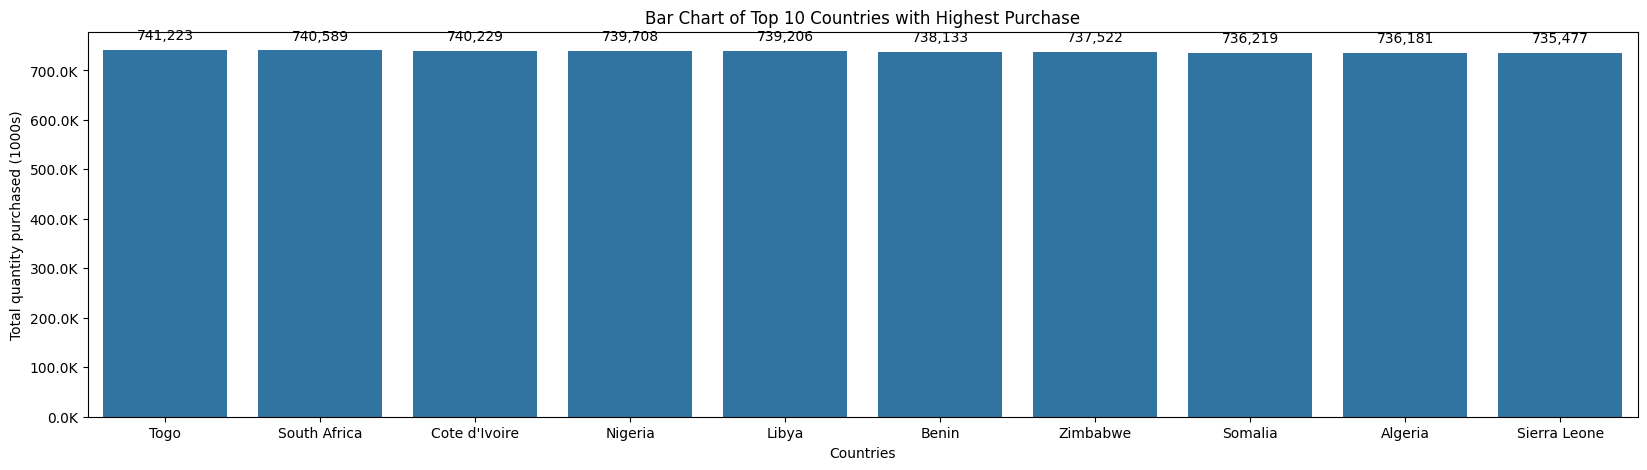

In [16]:
# Draw a plot of top 10 countries with highest number of quantity purchase
top_10_countries = quantity_per_country.head(10)

# Create a bar chart from the selected data
plt.figure(figsize=(20, 5))

y_format = FuncFormatter(lambda x, _: f'{x / 1000:.1f}K')
ax = sns.barplot(x='Country', y='Quantity', data=top_10_countries)
ax.yaxis.set_major_formatter(y_format)

# Add value labels on the bars
for index, row in top_10_countries.iterrows():
    ax.text(
        index,  # X-coordinate
        row['Quantity'] + 0.02 * max(top_10_countries['Quantity']),  # Y-coordinate (slightly above the bar)
        f"{row['Quantity']:,}",  # Label formatted with thousands separator
        ha='center',  # Center-align the text horizontally
        va='bottom',  # Bottom-align the text vertically
        fontsize=10,  # Font size of the label
        color='black'  # Label color
    )

# Customize labels and title
plt.xlabel('Countries')
plt.ylabel('Total quantity purchased (1000s)')
plt.title('Bar Chart of Top 10 Countries with Highest Purchase')
plt.show()


These countries represent the largest shares of product quantities and are critical to focus on for retention and engagement strategies.

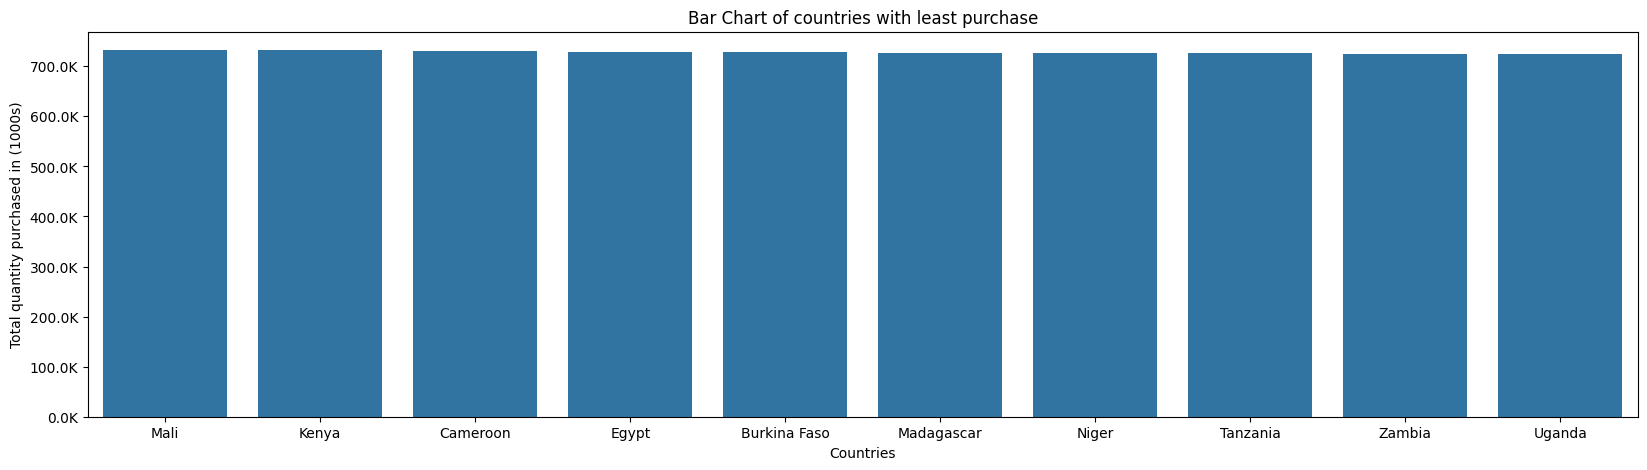

In [17]:
# Draw a plot of 10 countries with least number of quantity purchase
least_10_countries = quantity_per_country.tail(10)

# Create a bar chart from the selected data
plt.figure(figsize=(20, 5))

y_format = FuncFormatter(lambda x, _: f'{x / 1000:.1f}K')
ax = sns.barplot(x='Country', y='Quantity', data= least_10_countries)
ax.yaxis.set_major_formatter(y_format)

plt.xlabel('Countries')
plt.ylabel('Total quantity purchased in (1000s)')
plt.title('Bar Chart of countries with least purchase')
plt.show()

These countries have the lowest product quantities, which might indicate smaller customer bases or lower engagement.¶

Insights to Explore

Retention Focus on High-Quantity Countries:

- Togo, South Africa, and Cote d'Ivoire contribute significantly to sales quantities. Analyzing customer behavior and retention patterns in these countries can provide insights for targeted strategies. Low-Engagement Markets:

- Countries like Uganda, Zambia, and Tanzania might have unique challenges, such as lower product demand or limited engagement. Understanding barriers in these markets is essential. Correlation with Revenue:

- High quantities do not always equate to high revenue. Analyzing the relationship between quantity and revenue by country can highlight high-value markets.

Next Steps for Analysis

Retention and Churn by Country:

- Calculate retention rates and churn percentages for top and bottom countries to identify regional trends. Revenue Contribution:

- Multiply quantities by unit prices for each country to evaluate revenue distribution. Customer Segmentation by Region:

- Segment customers by country and analyze purchase patterns, repeat rates, and lifetime value. Tailored Engagement Strategies:

- Develop country-specific strategies for customer engagement and retention, focusing on the unique behavior of each region.




Bivariate analysis of countries and number of customer

In [18]:
country_to_customers = data.groupby(["Country"])["CustomerID"].nunique().reset_index()
country_to_customers = country_to_customers.sort_values("CustomerID", ascending = False).reset_index()
country_to_customers.rename(columns = {"CustomerID" : "Number of customers"}, inplace = True)

In [19]:
country_to_customers.head(5)

,index,Country,Number of customers
0,13,Mozambique,3072
1,1,Benin,3054
2,23,Togo,3053
3,15,Nigeria,3051
4,2,Burkina Faso,3049


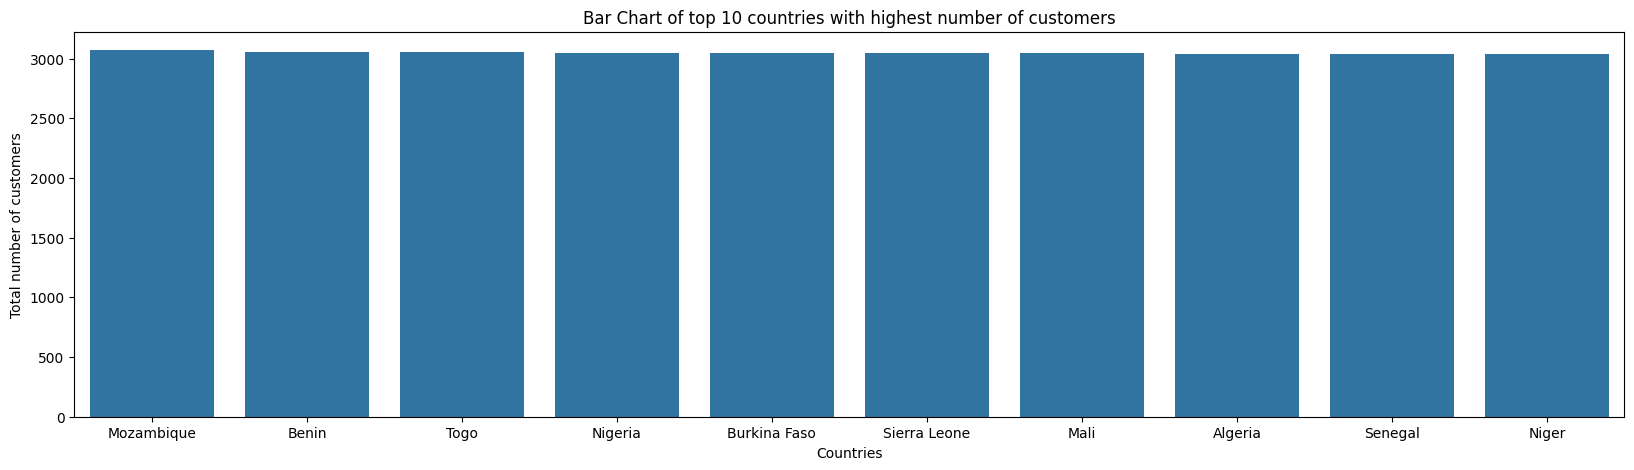

In [20]:
# Draw a plot of top 10 countries with highest number of customers (unique customerID)
top_countries_to_customers = country_to_customers.head(10)

# Create a bar chart from the selected data
plt.figure(figsize=(20, 5))

sns.barplot(x='Country', y='Number of customers', data= top_countries_to_customers)

plt.xlabel('Countries')
plt.ylabel('Total number of customers')
plt.title('Bar Chart of top 10 countries with highest number of customers')
plt.show()

**Key Insights**

- Mozambique and Benin Lead in Customer Base: These countries not only have large customer counts but may also contribute significantly to overall revenue and transactions. But these 2 countries are'nt among the top 10 countreis with highest quantity purchas. Focusing on these markets for further engagement and loyalty programs will be necessary

- Togo and Nigeria – Balanced Contributions: Both countries appear in the top 5 by quantity and top 5 by customer count, highlighting a strong customer base and high product demand.

- Smaller Customer Bases: Uganda, Morocco, and Somalia have smaller customer counts. Efforts to increase market penetration or engagement in these regions may be needed.

- Country-Level Retention and Engagement: Comparing the number of customers with the quantities sold and retention rates will help identify markets with low repeat purchase rates or high churn.

In [21]:
# Merge the two DataFrames on the 'Country' column
merged_df = pd.merge(country_to_customers, quantity_per_country, on='Country')

In [22]:
# Drop the 'index_x' and 'index_y' columns
merged_df = merged_df.drop(columns=['index_x', 'index_y'])

In [23]:
merged_df

,Country,Number of customers,Quantity
0,Mozambique,3072,735416
1,Benin,3054,738133
2,Togo,3053,741223
3,Nigeria,3051,739708
4,Burkina Faso,3049,728332
5,Sierra Leone,3046,735477
6,Mali,3044,732358
7,Algeria,3043,736181
8,Senegal,3040,733968
9,Niger,3039,725841


In [24]:
# Calculate the correlation between 'Number of customers' and 'Quantity'
correlation = merged_df[['Number of customers', 'Quantity']].corr()

In [25]:
# Print the correlation value
print("Correlation between Number of Customers and Quantity Sold:", correlation.loc['Number of customers', 'Quantity'])

Correlation between Number of Customers and Quantity Sold: 0.28927963593174877


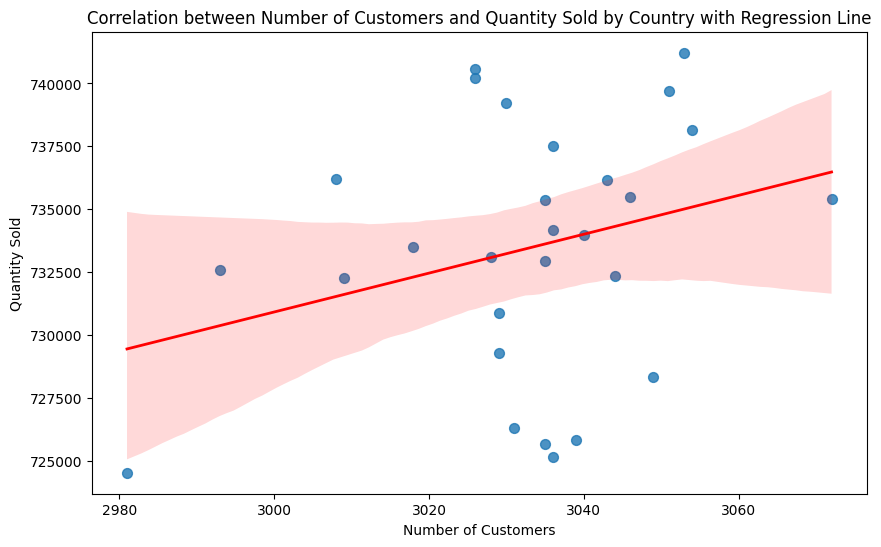

In [26]:
# Visualize the relationship with a scatter plot and a regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=merged_df, x='Number of customers', y='Quantity', scatter_kws={'s': 50}, line_kws={'color': 'red', 'lw': 2})
plt.title('Correlation between Number of Customers and Quantity Sold by Country with Regression Line')
plt.xlabel('Number of Customers')
plt.ylabel('Quantity Sold')
plt.show()

**Weak Correlation**
- 0.2893 is a relatively weak correlation, meaning that while there is some relationship between the number of customers and quantity sold, it is not very strong. Other factors might be influencing the quantity sold.
- This weak correlation suggests that factors other than just the number of customers may be contributing to the quantity sold (such as customer spending behavior, product preferences, marketing efforts, etc.).

**Product Category Comparison**

Description
Shoes               2069190
Jewelry             2065153
Toys                2063396
Furniture           2063221
Sports Equipment    2060571
Cloths              2054709
Cosmetics           2051088
Kitchenware         2046704
Electronics         2036733
Books               2025341
Name: Quantity, dtype: int64


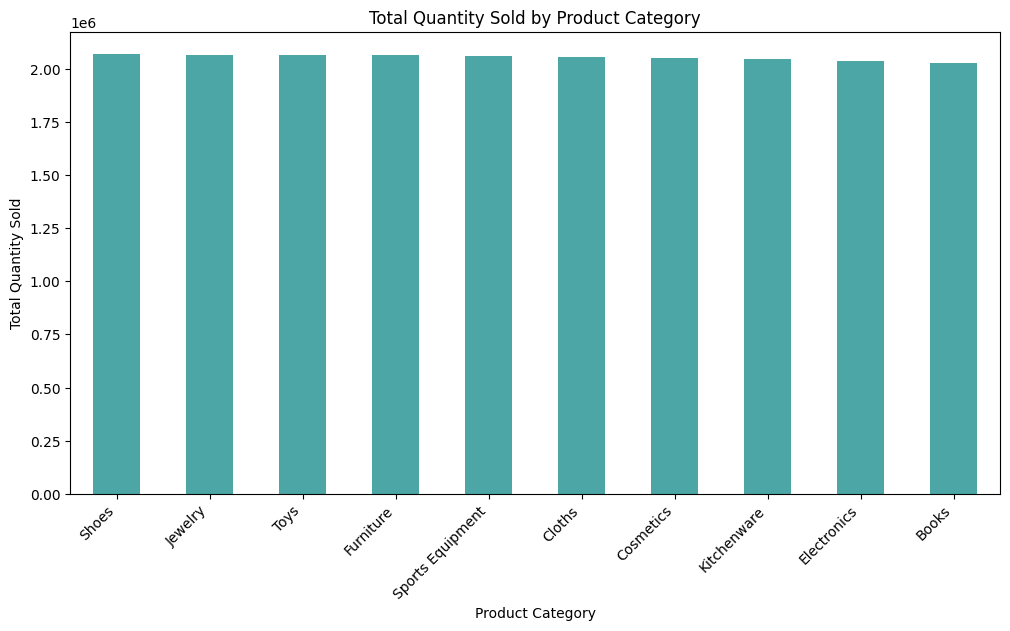

In [27]:
#Product analysis by quantity
# Group the data by product category and sum the quantity sold
product_sales = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

# Print the top categories
print(product_sales)  # Display top 10 categories

# Visualize the sales by product category
plt.figure(figsize=(12, 6))
product_sales.plot(kind='bar', color='teal', alpha=0.7)
plt.title('Total Quantity Sold by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')  # Rotate the labels for better readability
plt.show()

**Product Category Comparison**
- All categories have quantities in the millions, indicating strong overall sales and a diverse product portfolio. The sales distribution is fairly even, with no drastic differences between the top categories.
- Categories like Shoes, Jewelry, and Toys are leading in terms of sales, which may align with consumer trends or seasonal demand. Understanding consumer preferences and demand cycles could help in making targeted marketing decisions.



**Sales trend**

In [28]:
# Group the data by month and calculate the total monthly sales
monthly_sales = data.groupby(data['InvoiceDate'].dt.to_period('M'))['Quantity'].sum()

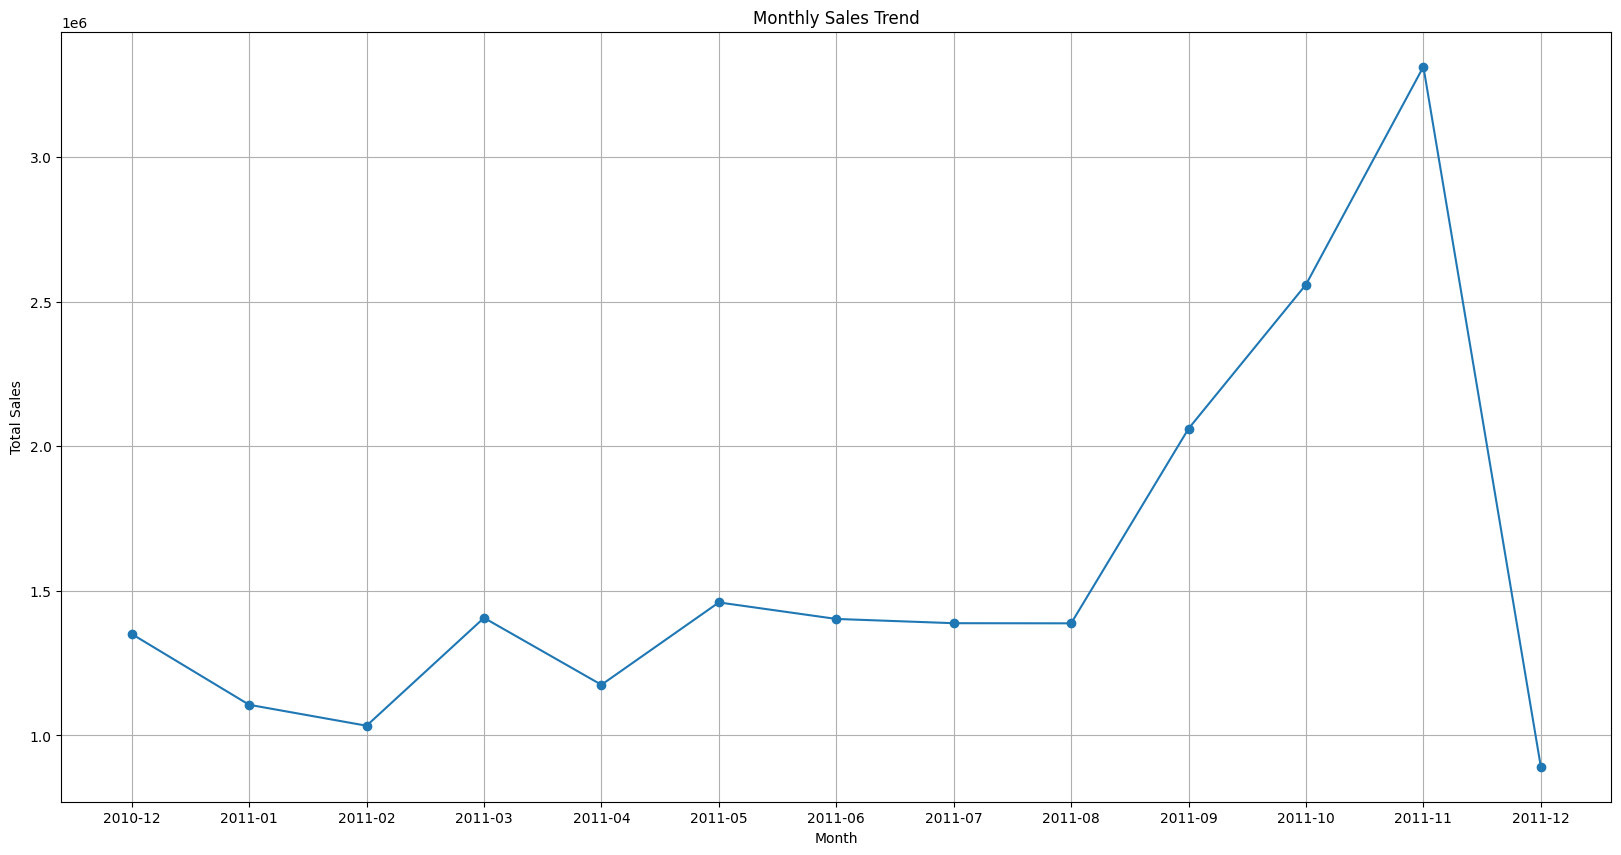

In [29]:
# Create a line chart
plt.figure(figsize=(20, 10))
plt.plot(monthly_sales.index.strftime('%Y-%m'), monthly_sales.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.grid(True)

# Display the plot
plt.show()

**Observations**

- December 2010 to August 2011: Noticeable fluctuations in sales quantity.
- August 2011 to November 2011: A significant sales increase occurred.
- November 2011 to December 2011: Sales experienced a sudden and substantial decline. This could indicate a drop-off in repeat customers , a change in purchase behavior or external factors affecting sales , Customer churn as products might be consumed or customers lost due to engagement issues.

**Cohort Analysis**

**Create cohort date**

- Since we are carrying out a Time-based cohort analysis, the cohorts will be grouped according to the dates they made their first purchase

- And Retention rate will be calculated by analysis the months they stayed active after their first purchase



In [30]:
#create Invoice month as new feature
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [31]:
data["InvoiceDate"]  = data["InvoiceDate"].apply(get_month)
data.tail()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal
541908,581587,2011-12-01,12680.0,SC9276,Toys,6,46.62,Ethiopia


In [32]:
def get_cohort_date(data):
    """ this function takes in the dataframe
        and returns the cohort date

        variables:
        data = dataframe
        cohort date = the first date they made a purchase
        """

    # assign the minimum date to all unique candidateID, i.e the first day they made a purchase
    data["cohort date"] = data.groupby("CustomerID")["InvoiceDate"].transform("min")

    return data["cohort date"]

In [33]:
#apply the function created to our dataframe and extract the 2 newly created column

data["cohort date"] = get_cohort_date(data)

In [34]:
data

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,cohort date
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01
...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-08-01
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-08-01
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-08-01
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-08-01


**create cohort index**

- A cohort index is a numerical representation that measures the time interval in months since a particular group (cohort) made their initial purchase. For example, an index of 4 indicates that this cohort made their first purchase four months ago.

- This will be calculated by subtracing the time the customer made first purchase (cohort date) from the recent purchase time (invoice date)


In [35]:
#create a function that extracts the year and month from the first and last cohort date

def get_year_and_month(data, col):
    """
    This function takes in the dataframe and column,
    and returns the month and year component for that column

    Variables:
    data = dataframe
    col = column
    month = month component
    year = year component"""

    month = data[col].dt.month
    year = data[col].dt.year
    return month, year

In [36]:
# apply the fucntion on cohort first date column
first_month, first_year = get_year_and_month(data,"cohort date")

In [37]:
first_month

,cohort date
0,12
1,12
2,12
3,12
4,12
...,...
541904,8
541905,8
541906,8
541907,8


In [38]:
# apply the fucntion on cohort latest date column
latest_month, latest_year = get_year_and_month(data,"InvoiceDate")

In [39]:
latest_month

,InvoiceDate
0,12
1,12
2,12
3,12
4,12
...,...
541904,12
541905,12
541906,12
541907,12


**CREATE COHORT INDEX**

In [40]:
# write a function to create cohort index
def create_cohort_index(first_month, first_year, latest_month,latest_year):
    """
    This code creates takes in the first and latest month and year
    and returns the calculated period(in months) the customer has been active

    variables:
    first_month: first month the customer made purchase
    first_year: first year the customer made purchase

    latest_month: recent month the customer made purchase
    latest_year: recent year the customer made purchase

    index: The duration between first and latest purchase (in months)"""

    year_diff = latest_year - first_year
    month_diff = latest_month - first_month
    index = year_diff*12 + month_diff +1 # +1 is added because of customers who have been active for just 1 month
    return index

# Identify one-time customers
# Step 1: Find first purchase date for each customer
data['first_purchase_date'] = data.groupby('CustomerID')['InvoiceDate'].transform('min')

# Step 2: Get latest purchase date for each customer
data['latest_purchase_date'] = data.groupby('CustomerID')['InvoiceDate'].transform('max')

# Step 3: Calculate cohort index for each purchase
data['cohort_index'] = data.apply(
    lambda row: create_cohort_index(
        row['first_purchase_date'].month,
        row['first_purchase_date'].year,
        row['InvoiceDate'].month,
        row['InvoiceDate'].year
    ), axis=1
)


In [41]:
data

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,cohort date,first_purchase_date,latest_purchase_date,cohort_index
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01,2010-12-01,2011-02-01,1
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01,2010-12-01,2011-02-01,1
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01,2010-12-01,2011-02-01,1
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01,2010-12-01,2011-02-01,1
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01,2010-12-01,2011-02-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-08-01,2011-08-01,2011-12-01,5
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-08-01,2011-08-01,2011-12-01,5
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-08-01,2011-08-01,2011-12-01,5
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-08-01,2011-08-01,2011-12-01,5


**Create a pivot table**

- To create a pivot table, first we need to know how many customers made a purchase each month after their first purchase

- for example: How many customers from the September cohort made a purchase four months after their initial purchase in September?

**Cohort table**

In [42]:
cohort_info = data.groupby(["cohort date","cohort_index"])["CustomerID"].nunique().reset_index()
cohort_info.rename(columns = {"CustomerID": "Number of customers"}, inplace = True)

In [43]:
cohort_info

,cohort date,cohort_index,Number of customers
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
...,...,...,...
86,2011-10-01,2,93
87,2011-10-01,3,46
88,2011-11-01,1,321
89,2011-11-01,2,43


**Pivot table**

In [44]:
# create a pivot table

cohort_table = cohort_info.pivot(index = "cohort date", columns = ["cohort_index"], values = "Number of customers")

#change index to understandable format
cohort_table.index = cohort_table.index.strftime('%B %Y')
cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
December 2010,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
January 2011,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
February 2011,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
March 2011,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
April 2011,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
May 2011,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
June 2011,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


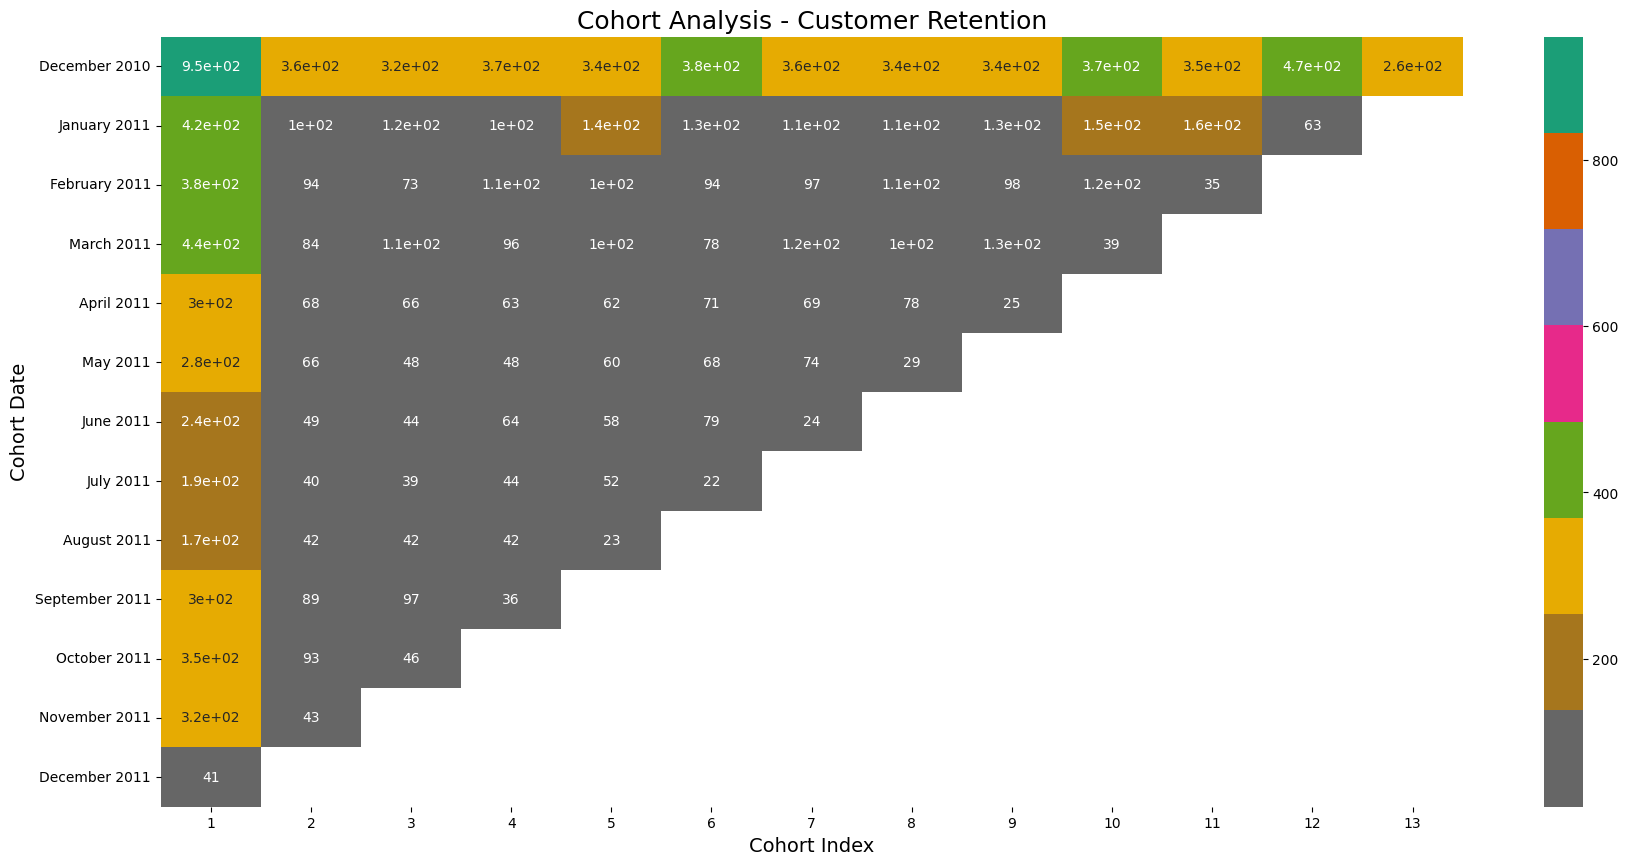

In [45]:
#visualize our results in heatmap

plt.figure(figsize = (21,10))
sns.heatmap(cohort_table, annot = True, cmap = 'Dark2_r')

plt.title('Cohort Analysis - Customer Retention', fontsize=18)
plt.xlabel('Cohort Index', fontsize=14)
plt.ylabel('Cohort Date', fontsize=14)
plt.show()

**Observe retention rate**
- To effeciently observe the customers rentention rate, lets plot the chart in percentage.



In [46]:
# showing retention rate in percentage
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0], axis = 0)
new_cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
December 2010,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
January 2011,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
February 2011,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
March 2011,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
April 2011,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
May 2011,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
June 2011,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


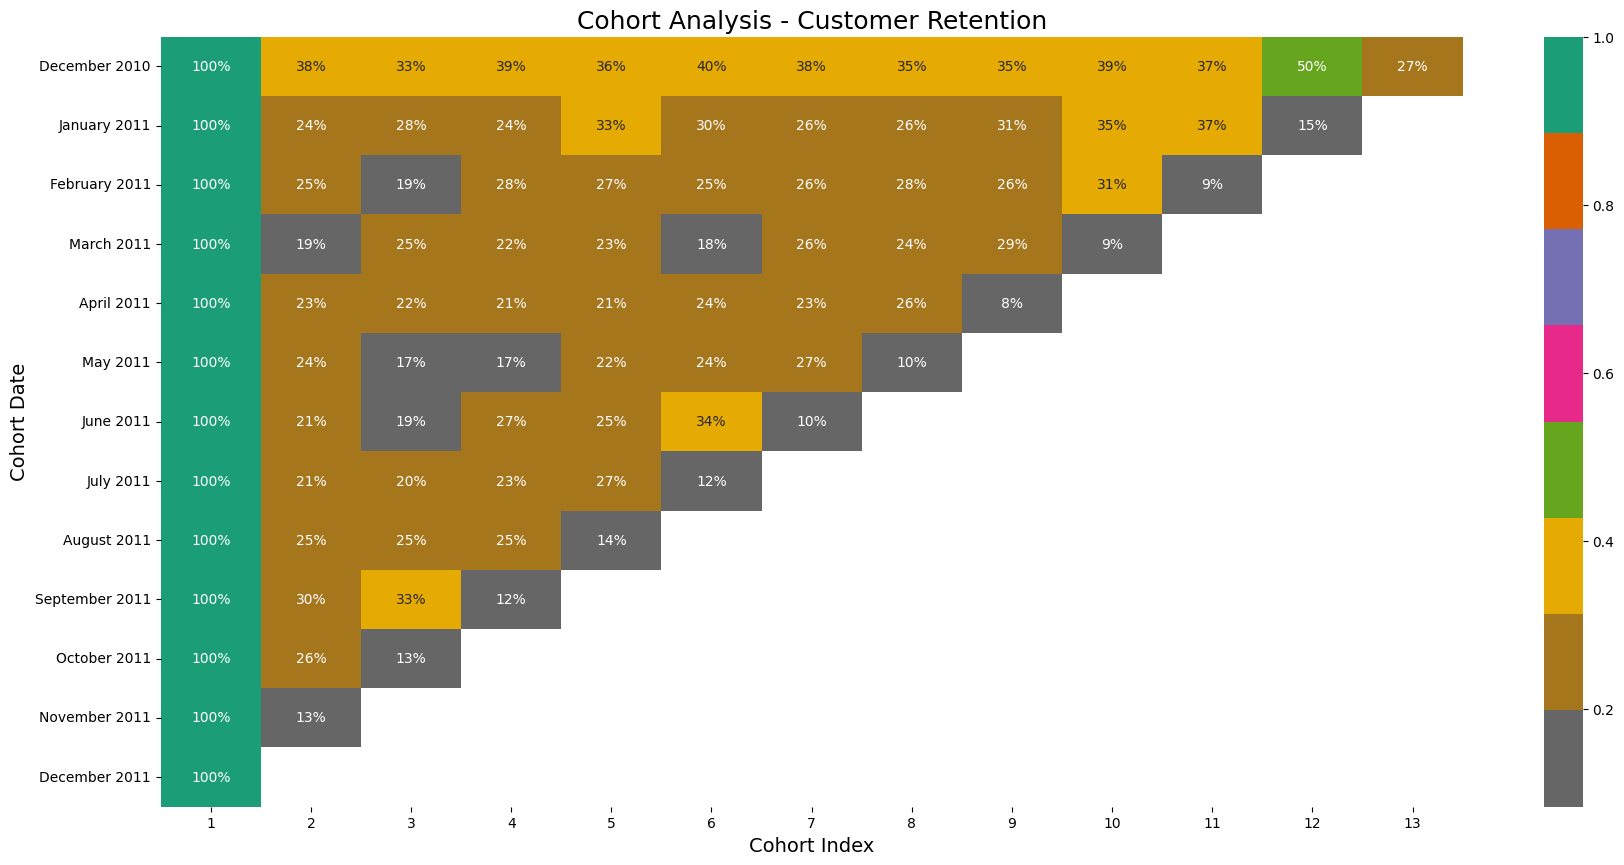

In [47]:
#visualize our results in heatmap

plt.figure(figsize = (21,10))
sns.heatmap(new_cohort_table, annot = True, cmap = 'Dark2_r', fmt = '.0%')

plt.title('Cohort Analysis - Customer Retention', fontsize=18)
plt.xlabel('Cohort Index', fontsize=14)
plt.ylabel('Cohort Date', fontsize=14)
plt.show()

The heatmap above illustrates the customer retention rates for each cohort.

**OBSERVATIONS**

A healthy retention rate for e-commerce platforms is typically considered to be in the range of 20% to 40%. This means that 20% to 40% of your customers continue to make purchases from your e-commerce platform after their initial purchase.

- **Retention Decay Over Time**: Retention rates start at 1.0 (100%) for each cohort in the first month (cohort index = 1), as expected since it's the initial purchase month. For most cohorts, retention rates drop significantly after the first month. This indicates that a large percentage of customers do not return to make a second purchase.

- **December 2010 Cohort Outperforms Others**: The fact that the December 2010 cohort has a retention rate above 30% is a positive sign. It suggests that this group of customers has remained engaged with your e-commerce platform over time. This could be due to various factors, such as the quality of your products/services, effective marketing, or a strong customer retention strategy.

- **January to April 2011 Cohorts**: Retention rates drop sharply after the first month and remain inconsistent. This pattern might indicate a lack of engagement strategies or external factors causing churn

- **Later Cohorts (May to August 2011)**: Retention rates generally decline more rapidly in later months. Some retention rates stabilize briefly before falling off entirely, especially in June and July 2011 cohorts.

- **Decline in December 2011**: The observation that all cohorts have low retention rates in December 2011 suggests that there may have been specific challenges or issues affecting customer retention during that time. It's important to investigate what might have caused this decline and whether it's a one-time event or a recurring pattern

- **Variability in Retention Rates**: The range of retention rates, from a minimum of 8% to a maximum of 50%, suggests that there is significant variability in how different cohorts of customers are behaving. While 8% is relatively low, 50% is relatively high, considering the standard e-commerce retention rates mentioned earlier.

**RECOMMENDATIONS**

- Identify Factors Driving High Retention (December 2010): Analyze what factors have contributed to the high retention rate for the December 2010 cohort. Was there a specific marketing campaign, product improvement, or customer engagement strategy that worked well for this group? Try to replicate successful strategies for other cohorts.

- Investigate December 2011 Drop: Investigate why all cohorts have low retention rates on December 2011. It might involve analyzing customer feedback, product quality, customer service, or any changes in your business operations during that time. Identifying and addressing the root causes of this drop is crucial for improving future retention rates.

- Set Realistic Targets: While the standard e-commerce retention rate range is 20% to 40%, it's essential to set targets that are specific to your business and its circumstances. Aim to improve retention rates gradually over time based on your historical data and industry benchmarks.

- Implement Retention Strategies: Develop and implement retention strategies that are tailored to different cohorts of customers. Most especially during the first 1-3 months to encourage repeat purchages. Personalized marketing, loyalty programs, and targeted communication can help improve retention rates.

- Continuously Monitor and Adapt: Retention rates can change over time due to various factors, so it's crucial to continuously monitor them, collect feedback from those who churned early and adapt your strategies accordingly. Regularly analyzing cohort data and customer behavior will help you make informed decisions to improve retention.

**In addtion to observing the behaviour of each cohort, we can create a table which shows the average quantity of product bought by each cohort and how it fluctuates**.


In [48]:
#Average quantity bought
average_quantity = data.groupby(["cohort date", "cohort_index"])["Quantity"].mean().reset_index()
average_quantity["Quantity"] = average_quantity["Quantity"].round(1)


In [49]:
average_quantity.rename(columns = {"Quantity": "average quantity"}, inplace = True)
average_quantity

,cohort date,cohort_index,average quantity
0,2010-12-01,1,50.3
1,2010-12-01,2,50.3
2,2010-12-01,3,50.4
3,2010-12-01,4,50.6
4,2010-12-01,5,50.6
...,...,...,...
86,2011-10-01,2,49.9
87,2011-10-01,3,49.4
88,2011-11-01,1,51.1
89,2011-11-01,2,48.6


In [50]:
# create a pivot table

quantity_table = average_quantity.pivot(index = "cohort date", columns = ["cohort_index"], values = "average quantity")

#change index to understandable format
quantity_table.index = quantity_table.index.strftime('%B %Y')
quantity_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
December 2010,50.3,50.3,50.4,50.6,50.6,50.4,50.5,50.5,50.2,50.6,50.5,50.6,50.7
January 2011,50.7,50.6,50.8,50.6,50.9,50.4,50.3,50.4,50.5,49.9,50.6,50.5,NaN
February 2011,51.2,49.7,51.0,50.3,50.2,50.7,49.2,50.7,50.9,49.6,50.1,NaN,NaN
March 2011,50.5,50.2,50.2,50.2,50.1,50.6,50.0,51.1,50.1,50.4,NaN,NaN,NaN
April 2011,50.7,49.9,50.0,50.1,50.6,50.3,50.3,49.9,51.1,NaN,NaN,NaN,NaN
May 2011,50.7,49.4,50.2,49.7,51.2,50.5,49.9,51.4,NaN,NaN,NaN,NaN,NaN
June 2011,50.6,51.0,48.5,50.6,51.4,50.9,50.3,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,50.7,49.5,50.8,50.1,49.8,50.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,50.5,49.8,50.4,51.0,50.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_index', ylabel='cohort date'>

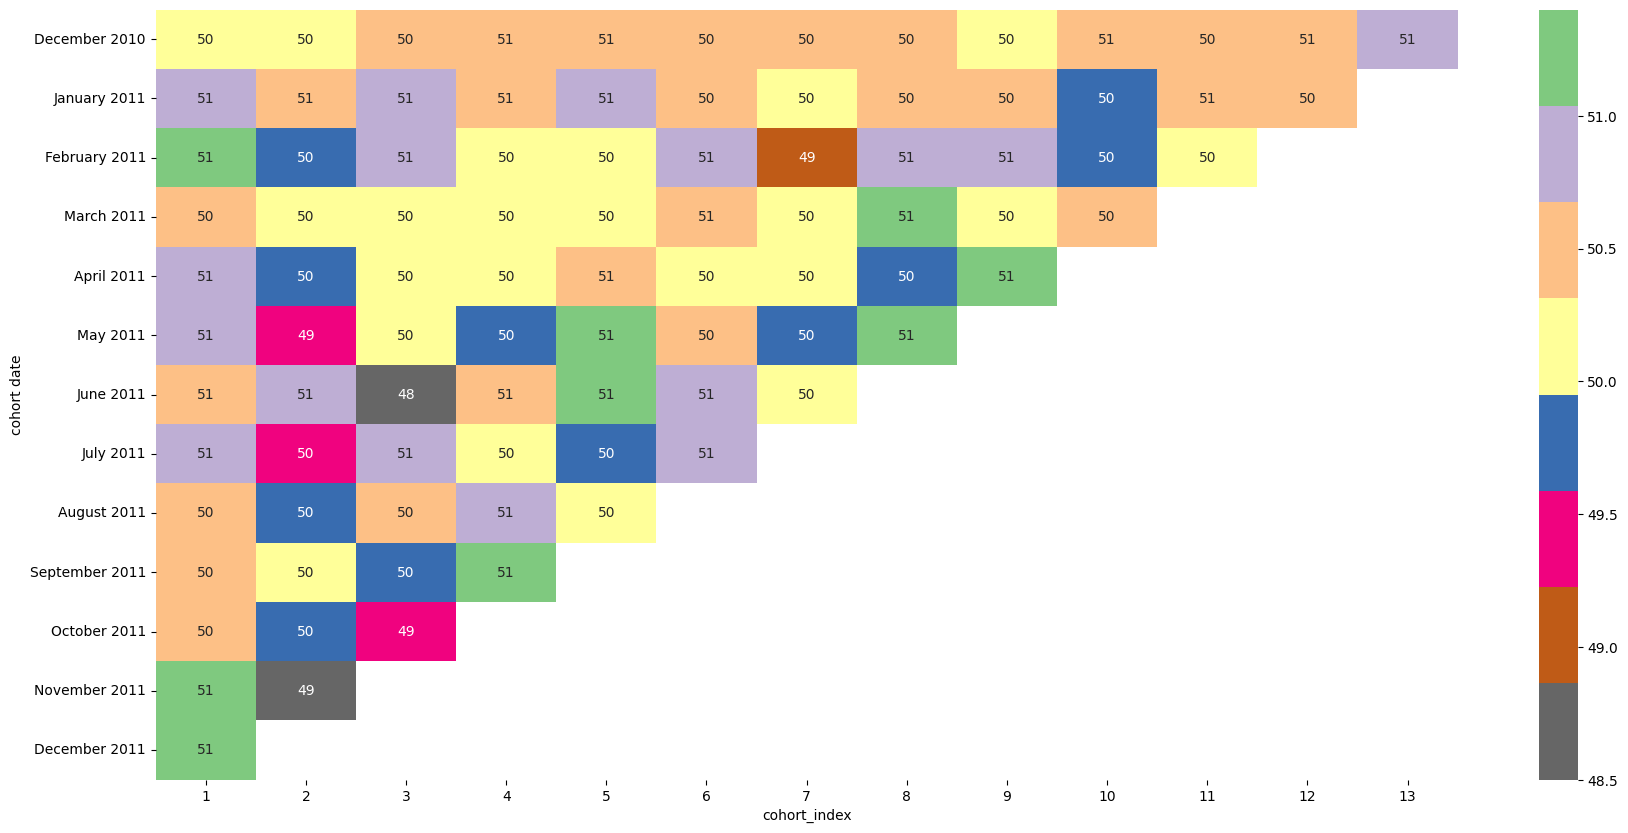

In [51]:
#visualize our results in heatmap

plt.figure(figsize = (21,10))
sns.heatmap(quantity_table, annot = True, cmap = 'Accent_r')

**Observations**

Although there is significant drop in customer retention after their first month as observed on the previous chart, the average quantity bought is not experiencing much fluctuations. Meaning there is possibiity that a few customers tends to puchase alot of product, therefore maintaining the average value

**Recommendation**

This can serve as a signal to carryout targetted marketing in countries where more quantites are sold in contrast to targeting countries where more customers are acquired.

**Purchasing Behavior of one time customers**

**Questions to Explore**

- What percentage of your customer base are one-time buyers?
- Are specific product categories or pricing strategies more common among one-time customers?
- How do their retention rates vary across cohorts?
- What actions or incentives have historically converted one-time buyers into repeat customers?

In [52]:
print(data['cohort_index'].value_counts())

cohort_index
1     119191
2      29147
4      28075
6      27576
3      27493
5      25926
12     24520
7      24214
8      24200
10     24075
9      23672
11     21331
13      7409
Name: count, dtype: int64


In [53]:
# Identify customers who made their first purchase (cohort_index == 1)
one_time_customers = data[data['cohort_index'] == 1]

# Check if these customers made any subsequent purchases (i.e., cohort_index > 1)
customers_with_returns = data[data['cohort_index'] > 1]

# Filter out the customers who made returns (cohort_index > 1)
true_one_time_customers = one_time_customers[~one_time_customers['CustomerID'].isin(customers_with_returns['CustomerID'])]

# Get unique count of true one-time customers who never returned
unique_true_one_time_customers = true_one_time_customers['CustomerID'].nunique()

# Display the result
print(f"Unique One-Time Customers (Never Returned): {unique_true_one_time_customers}")


Unique One-Time Customers (Never Returned): 1572


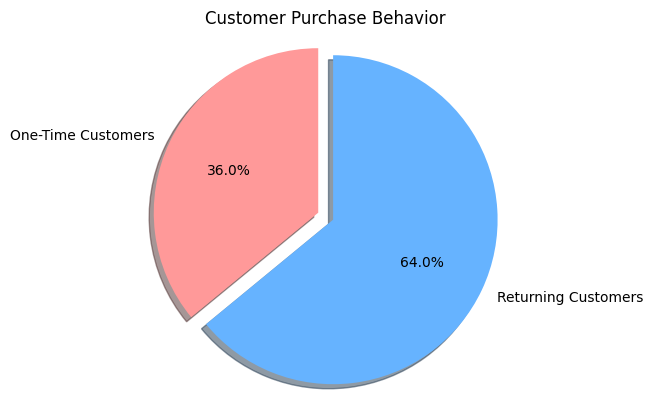

Unique One-Time Customers (Never Returned): 1572


In [54]:
# Calculate the total number of unique customers
total_unique_customers = data['CustomerID'].nunique()

# Calculate the number of customers who returned (total customers - one-time customers)
returned_customers = total_unique_customers - unique_true_one_time_customers

# Plot pie chart
labels = ['One-Time Customers', 'Returning Customers']
sizes = [unique_true_one_time_customers, returned_customers]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # explode the first slice (One-Time Customers)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Customer Purchase Behavior')
plt.show()

# Display the result
print(f"Unique One-Time Customers (Never Returned): {unique_true_one_time_customers}")

**Insights**
- **Opportunity for Growth in One-Time Buyers**: Out of 4372 Customers, 1572 customers only purchased once and never returend (36%). While a substantial percentage of these customers are one-time buyers, there is a significant opportunity to convert them into repeat customers. One-time buyers might not have had enough reason to return or could have been satisfied but not sufficiently engaged.
- Understanding why these customers made only one purchase can help in designing targeted campaigns to win them back. Consider offering special promotions, loyalty programs, or personalized communication to encourage repeat business.
- **Revenue from Returning Customers**: Returning customers often represent a more reliable and stable source of revenue. Businesses that can maintain a strong base of returning customers can better predict future sales and focus on sustainable growth rather than just acquisition.
- **Increased Lifetime Value**: If you can convert more one-time buyers into repeat customers, the Customer Lifetime Value (CLTV) would likely increase, which directly impacts profitability. Focusing on strategies that enhance CLTV can ensure long-term business success.


Unique One-Time Customers by Country (Descending Order):
Country
Nigeria          69
Senegal          69
Benin            67
Ghana            66
Uganda           64
Tanzania         63
Zambia           61
Mali             61
Rwanda           59
Burkina Faso     58
Egypt            58
Togo             56
Niger            56
Tunisia          56
Libya            56
Cameroon         56
Kenya            56
Algeria          54
Sudan            53
Ethiopia         53
Mozambique       52
Madagascar       52
Sierra Leone     49
Zimbabwe         48
South Africa     47
Morocco          45
Cote d'Ivoire    45
Somalia          43
Name: CustomerID, dtype: int64


<ipython-input-55-b88b9618c343>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_one_time_customers_by_country_count.index, y=unique_one_time_customers_by_country_count.values, palette='viridis')


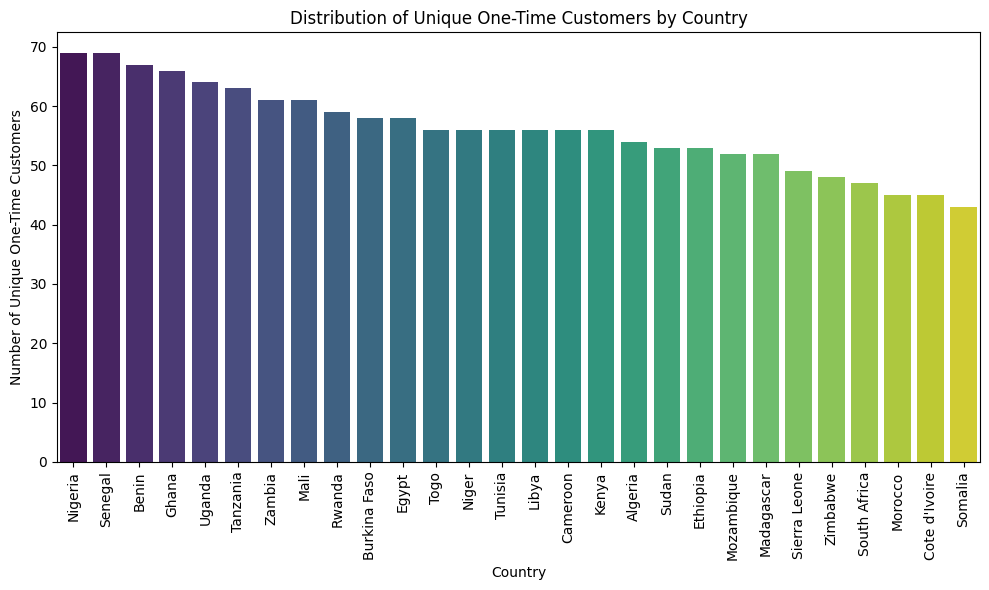

In [55]:
# Get unique one-time customers by country
unique_one_time_customers_by_country = true_one_time_customers.drop_duplicates(subset=['CustomerID'])  # Remove duplicate customers
unique_one_time_customers_by_country_count = unique_one_time_customers_by_country.groupby('Country')['CustomerID'].nunique()

# Sort the result in descending order
unique_one_time_customers_by_country_count = unique_one_time_customers_by_country_count.sort_values(ascending=False)

# Print the result
print("Unique One-Time Customers by Country (Descending Order):")
print(unique_one_time_customers_by_country_count)

# Plot the distribution using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=unique_one_time_customers_by_country_count.index, y=unique_one_time_customers_by_country_count.values, palette='viridis')

# Customize the plot
plt.title('Distribution of Unique One-Time Customers by Country')
plt.xlabel('Country')
plt.ylabel('Number of Unique One-Time Customers')
plt.xticks(rotation=90)  # Rotate country labels if needed
plt.tight_layout()  # To avoid cutting off labels
plt.show()

In [56]:
import pandas as pd

# 1. Identify customers who made their first purchase (cohort_index == 1)
one_time_customers = data[data['cohort_index'] == 1]

# 2. Check if these customers made any subsequent purchases (i.e., cohort_index > 1)
customers_with_returns = data[data['cohort_index'] > 1]

# 3. Filter out the customers who made returns (i.e., cohort_index > 1)
true_one_time_customers = one_time_customers[~one_time_customers['CustomerID'].isin(customers_with_returns['CustomerID'])]

# 4. Get the unique count of true one-time customers who never returned
unique_true_one_time_customers = true_one_time_customers['CustomerID'].nunique()

# 5. Print the number of true one-time customers
print(f"Unique One-Time Customers (Never Returned): {unique_true_one_time_customers}")

# Optional: check the number of entries of one-time customers and those who returned
print(f"Total One-Time Customers (Entries): {one_time_customers['CustomerID'].nunique()}")
print(f"Total Returning Customers (Entries): {customers_with_returns['CustomerID'].nunique()}")


Unique One-Time Customers (Never Returned): 1572
Total One-Time Customers (Entries): 4372
Total Returning Customers (Entries): 2800


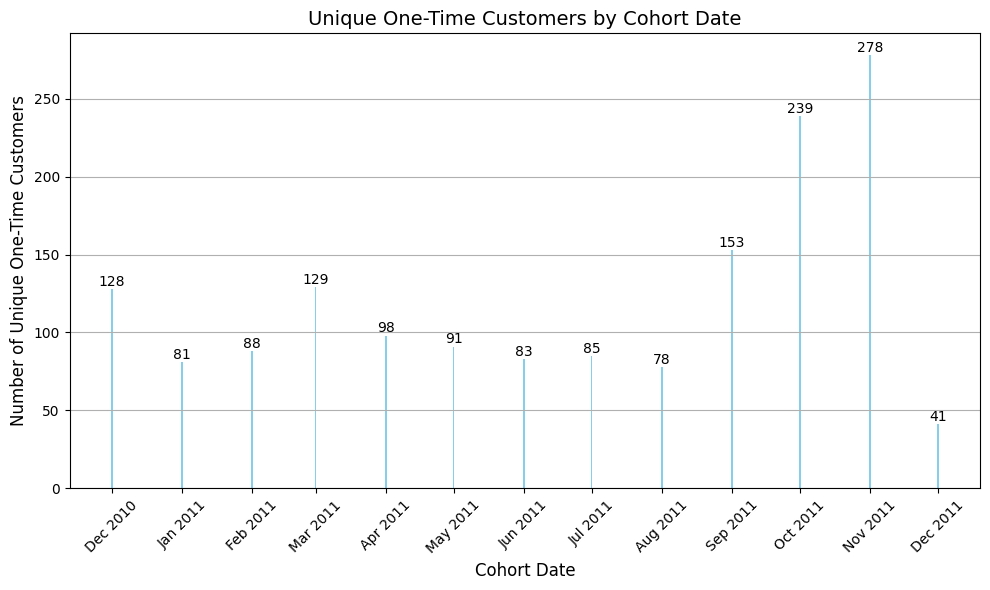

In [57]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the 'cohort date' is in datetime format
data['cohort date'] = pd.to_datetime(data['cohort date'])

# Step 1: Identify one-time customers
one_time_customers = data[data['cohort_index'] == 1]

# Step 2: Check if these customers made any subsequent purchases (cohort_index > 1)
customers_with_returns = data[data['cohort_index'] > 1]

# Step 3: Filter out the customers who made returns (i.e., cohort_index > 1)
true_one_time_customers = one_time_customers[~one_time_customers['CustomerID'].isin(customers_with_returns['CustomerID'])]

# Step 4: Group by 'cohort date' and count unique one-time customers for each cohort
cohort_distribution = true_one_time_customers.groupby('cohort date')['CustomerID'].nunique().sort_index()

# Step 5: Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(cohort_distribution.index, cohort_distribution.values, color='skyblue')

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, round(yval), ha='center', va='bottom', fontsize=10)

# Format the x-axis labels to display as "Dec 2010", "Jan 2011", etc.
plt.xticks(ticks=cohort_distribution.index, labels=cohort_distribution.index.strftime('%b %Y'), rotation=45)

# Add labels and title
plt.title('Unique One-Time Customers by Cohort Date', fontsize=14)
plt.xlabel('Cohort Date', fontsize=12)
plt.ylabel('Number of Unique One-Time Customers', fontsize=12)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


**Insights**
- **Fluctuating Behavior**: The one-time customer count varies across months, with spikes in certain months like March 2011 (129) and September 2011 (153). These fluctuations might correlate with marketing campaigns, product launches, or external events.
- **Seasonal Trends**: There is a noticeable increase in one-time customers towards the end of the year (October–November). This aligns with typical retail patterns where holiday sales attract first-time buyers.
- **Retention Challenges** : These are customers who made a purchase and didn’t return, suggesting potential issues with customer retention strategies

In [58]:
# Filter products purchased by unique one-time customers
one_time_customer_ids = true_one_time_customers['CustomerID'].unique()
one_time_customer_data = data[data['CustomerID'].isin(one_time_customer_ids)]

# Analyze product descriptions by total quantity purchased
product_description_analysis = (
    one_time_customer_data.groupby('Description')['Quantity']
    .sum()
    .sort_values(ascending=False)
)

# Display the top products by quantity purchased
print("Top Products Purchased by One-Time Customers:")
print(product_description_analysis.head(10))

# Analyze pricing trends for these products
pricing_analysis = (
    one_time_customer_data.groupby('Description')['UnitPrice']
    .mean()
    .sort_values(ascending=False)
)

# Display the top products by average price
print("\nTop Products Purchased by One-Time Customers (Average Price):")
print(pricing_analysis.head(10))


Top Products Purchased by One-Time Customers:
Description
Kitchenware         200303
Sports Equipment    199920
Shoes               194248
Cloths              193804
Toys                193797
Furniture           192901
Electronics         192534
Cosmetics           191524
Jewelry             191114
Books               188920
Name: Quantity, dtype: int64

Top Products Purchased by One-Time Customers (Average Price):
Description
Shoes               51.340880
Electronics         51.066085
Books               50.984726
Cosmetics           50.651940
Toys                50.476772
Furniture           50.367271
Jewelry             50.258113
Kitchenware         49.905978
Sports Equipment    49.829936
Cloths              49.695618
Name: UnitPrice, dtype: float64


**Product-Specific Challenges:**
- Kitchenware and Sports Equipment may serve as "functional" categories, often purchased as one-time needs.
- Books and Electronics, while having higher average prices, could have fewer opportunities for repeat purchases due to limited interest in similar items or lack of variety.

**Lack of Follow-Up Engagement**
- Customers purchasing lower-cost or "everyday use" items like Cloths and Cosmetics might not return if:
- There’s no follow-up on their purchase.
They lack incentives, such as loyalty programs or personalized discounts.


**Recommendations**:
**Reevaluate Product Marketing**
- For Kitchenware, Sports Equipment, and Shoes, emphasize upselling or complementary products to encourage follow-up purchases.
- Showcase new product lines in these categories to prevent them from being perceived as “one-time need” items.

**incentives for Repeat Purchases**
- Offer discounts or promotional bundles for high-priced items like Electronics or Books to incentivize returning customers.
- Consider targeted promotions for repeat purchases, especially in high-demand categories like Shoes and Toys

**Revenue by Cohort**

In [59]:
# Calculate Revenue
data['Revenue'] = data['Quantity'] * data['UnitPrice']
data['Revenue']

,Revenue
0,664.95
1,1862.95
2,4796.22
3,370.95
4,1941.50
...,...
541904,913.25
541905,8521.10
541906,560.98
541907,3592.35


In [60]:
# Group data by CohortMonth and CohortIndex
cohort_revenue = data.groupby(['cohort date', 'cohort_index'])['Revenue'].sum().reset_index()
cohort_revenue

,cohort date,cohort_index,Revenue
0,2010-12-01,1,67923671.84
1,2010-12-01,2,27538268.56
2,2010-12-01,3,23330157.15
3,2010-12-01,4,31013403.23
4,2010-12-01,5,25525592.43
...,...,...,...
86,2011-10-01,2,9177127.01
87,2011-10-01,3,2236604.07
88,2011-11-01,1,29406105.30
89,2011-11-01,2,2846367.16


In [61]:
# Retain the original datetime format for sorting but display as 'MMM YYYY'
cohort_revenue['cohort_date_str'] = cohort_revenue['cohort date'].dt.strftime('%b %Y')

# Create a pivot table with the new formatted date as the index
clv_table = cohort_revenue.pivot(index="cohort_date_str", columns="cohort_index", values="Revenue")

# Sort the index by the original cohort date
clv_table = clv_table.reindex(index=cohort_revenue['cohort date'].drop_duplicates().dt.strftime('%b %Y'))

# Calculate cumulative revenue for each cohort
clv_table = clv_table.cumsum(axis=1)

# Display the result
clv_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
Dec 2010,67923671.84,95461940.40,1.187921e+08,1.498055e+08,1.753311e+08,2.078897e+08,2.383382e+08,2.691656e+08,2.996284e+08,3.377779e+08,3.746098e+08,4.334172e+08,4.525114e+08
Jan 2011,28291062.06,34377809.75,4.228240e+07,4.843191e+07,5.830766e+07,6.676565e+07,7.414344e+07,8.163323e+07,9.152544e+07,1.044441e+08,1.210788e+08,1.250391e+08,NaN
Feb 2011,22668452.33,26503716.56,3.143805e+07,3.759528e+07,4.310620e+07,4.836389e+07,5.401495e+07,6.080627e+07,6.840102e+07,7.575353e+07,7.684376e+07,NaN,NaN
Mar 2011,28618836.95,32393137.69,3.880997e+07,4.469972e+07,5.076424e+07,5.615147e+07,6.311112e+07,7.220010e+07,8.297649e+07,8.543979e+07,NaN,NaN,NaN
Apr 2011,18756293.94,22352696.61,2.571507e+07,2.899758e+07,3.247802e+07,3.777212e+07,4.262510e+07,4.821201e+07,4.957346e+07,NaN,NaN,NaN,NaN
May 2011,15736690.58,18570168.30,2.080860e+07,2.304957e+07,2.689286e+07,3.281722e+07,3.762871e+07,3.972572e+07,NaN,NaN,NaN,NaN,NaN
Jun 2011,14593374.10,17046614.27,1.887884e+07,2.275318e+07,2.717163e+07,3.362712e+07,3.521429e+07,NaN,NaN,NaN,NaN,NaN,NaN
Jul 2011,12906348.08,14240461.94,1.775114e+07,2.127271e+07,2.579302e+07,2.711714e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aug 2011,12064586.53,16037958.53,2.336948e+07,3.064733e+07,3.291470e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


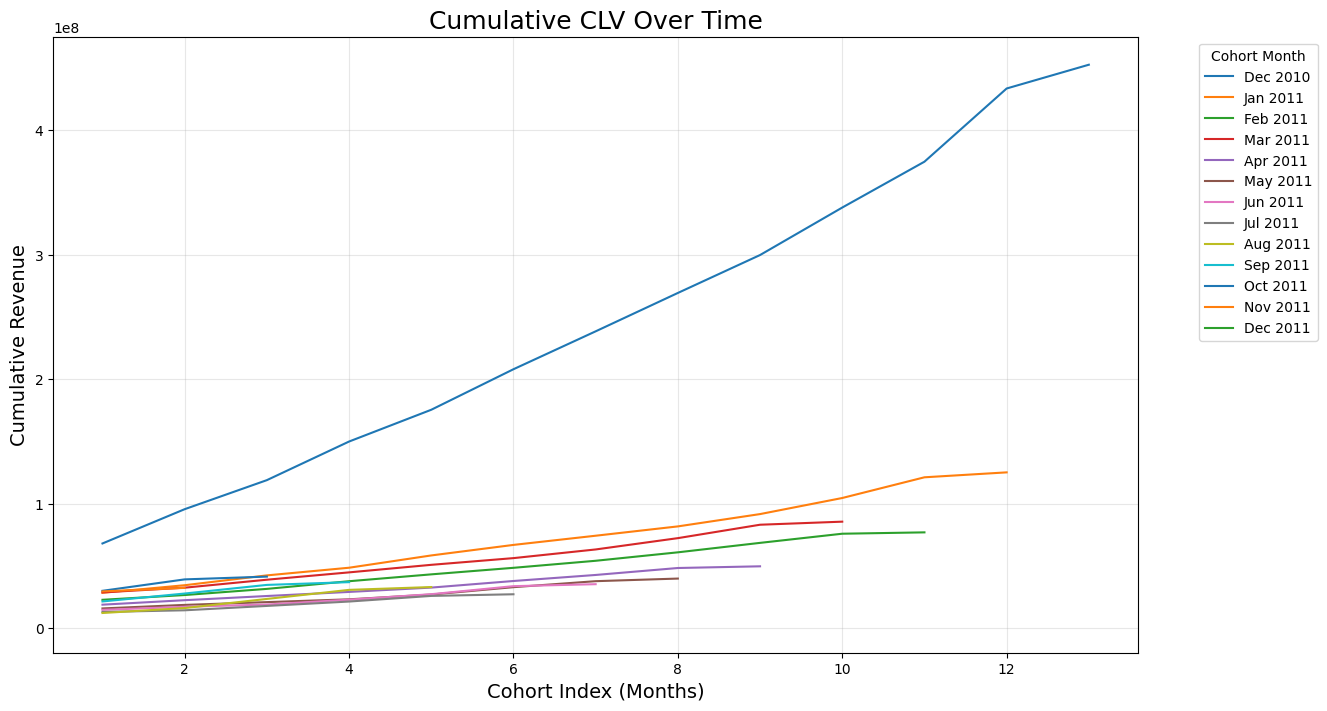

In [62]:
#Cumulative CLV Line Chart
plt.figure(figsize=(14, 8))
for cohort in clv_table.index:
    plt.plot(clv_table.columns, clv_table.loc[cohort], label=str(cohort))

plt.title('Cumulative CLV Over Time', fontsize=18)
plt.xlabel('Cohort Index (Months)', fontsize=14)
plt.ylabel('Cumulative Revenue', fontsize=14)
plt.legend(title='Cohort Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

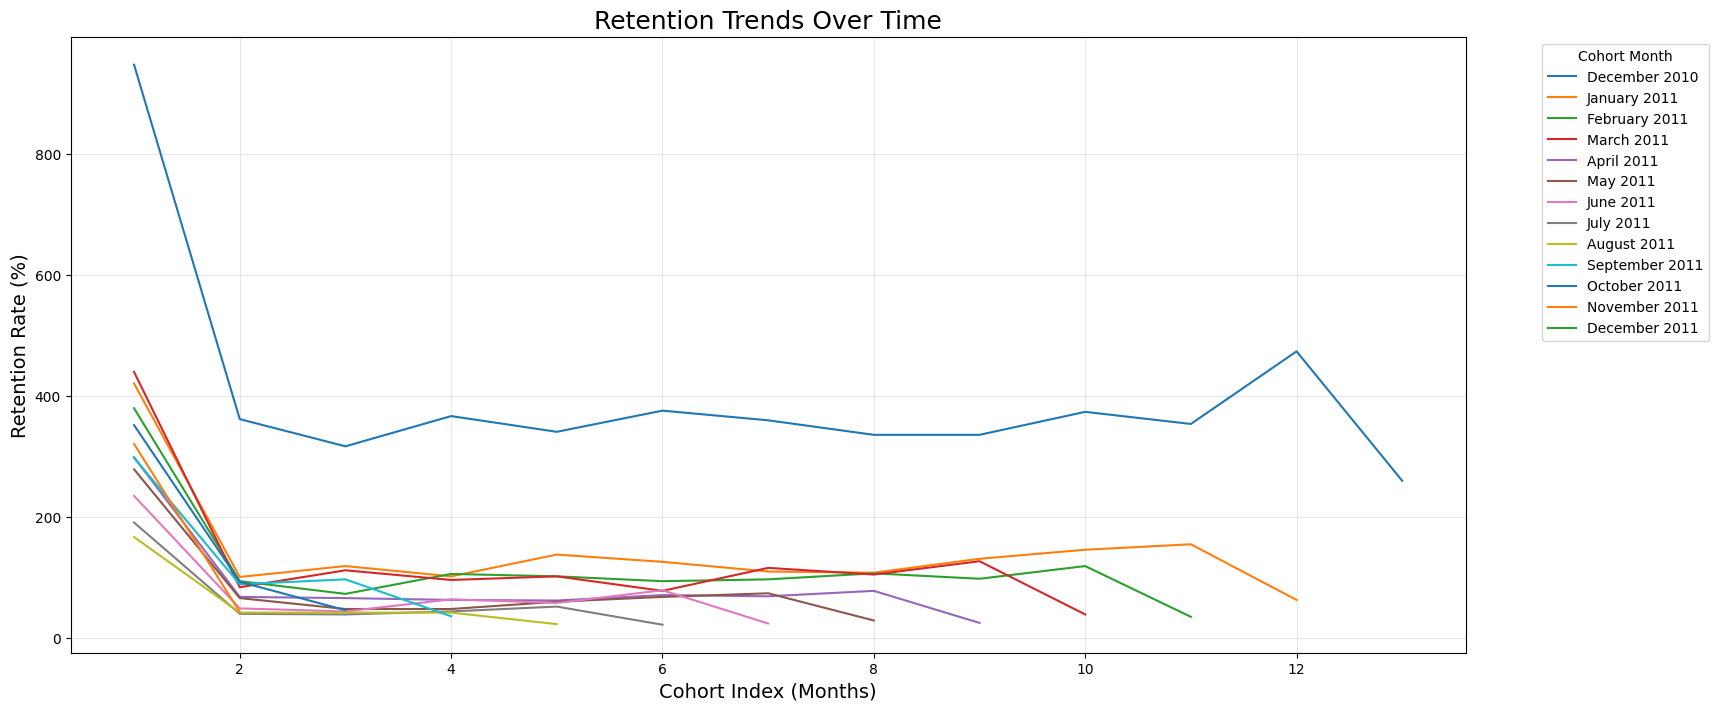

In [63]:
# Retention Trends Line Chart
plt.figure(figsize=(18, 8))
for cohort in cohort_table.index:
    plt.plot(cohort_table.columns, cohort_table.loc[cohort], label=str(cohort))

plt.title('Retention Trends Over Time', fontsize=18)
plt.xlabel('Cohort Index (Months)', fontsize=14)
plt.ylabel('Retention Rate (%)', fontsize=14)
plt.legend(title='Cohort Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

**DATA PREPROCESSING**

In [64]:
#creating a copy of the dataset
data2 = data.copy()

In [65]:
# Drop columns (e.g., "Column1" and "Column3")
columns_to_drop = ["InvoiceNo", "InvoiceDate","CustomerID","StockCode"]
data2 = data2.drop(columns=columns_to_drop)

In [66]:
data3 = data2.copy()

In [67]:
data2.isna().sum()

,0
Description,0
Quantity,0
UnitPrice,0
Country,0
cohort date,0
first_purchase_date,0
latest_purchase_date,0
cohort_index,0
Revenue,0


In [68]:
#importing libraries for encoding
from sklearn.preprocessing import LabelEncoder

In [69]:
#creating a copy of the dataset
data2.dtypes

,0
Description,object
Quantity,int64
UnitPrice,float64
Country,object
cohort date,datetime64[ns]
first_purchase_date,datetime64[ns]
latest_purchase_date,datetime64[ns]
cohort_index,int64
Revenue,float64


In [70]:
# Check for categorical variables (object dtype) and datetime columns
cat_var = (data2.dtypes == "object") | (data2.dtypes == "datetime64[ns]")

# Display the result
cat_var

,0
Description,True
Quantity,False
UnitPrice,False
Country,True
cohort date,True
first_purchase_date,True
latest_purchase_date,True
cohort_index,False
Revenue,False


In [71]:
cat_var = (data2.dtypes == "object") | (data2.dtypes == "datetime64[ns]")
cat_feat = list(cat_var[cat_var].index)

cat_feat

['Description',
 'Country',
 'cohort date',
 'first_purchase_date',
 'latest_purchase_date']

In [72]:
# encode categorical data into numeriacal data
cat_var = (data2.dtypes == "object") | (data2.dtypes == "datetime64[ns]")
cat_feat = list(cat_var[cat_var].index)

encoder = LabelEncoder()
for x in cat_feat:
    data2[x] = data2[[x]].apply(encoder.fit_transform)

data2

,Description,Quantity,UnitPrice,Country,cohort date,first_purchase_date,latest_purchase_date,cohort_index,Revenue
0,3,65,10.23,5,0,0,2,1,664.95
1,4,95,19.61,11,0,0,2,1,1862.95
2,0,78,61.49,11,0,0,2,1,4796.22
3,9,15,24.73,20,0,0,2,1,370.95
4,9,50,38.83,16,0,0,2,1,1941.50
...,...,...,...,...,...,...,...,...,...
541904,4,25,36.53,13,8,8,12,5,913.25
541905,1,94,90.65,24,8,8,12,5,8521.10
541906,4,14,40.07,19,8,8,12,5,560.98
541907,2,45,79.83,17,8,8,12,5,3592.35


In [73]:
# Data Normalisation

#import scaler from library
from sklearn.preprocessing import MinMaxScaler

#instantiate the scaler object
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data2),columns=data2.columns)
scaled_data

,Description,Quantity,UnitPrice,Country,cohort date,first_purchase_date,latest_purchase_date,cohort_index,Revenue
0,0.333333,0.646465,0.093232,0.185185,0.000000,0.000000,0.166667,0.000000,0.066408
1,0.444444,0.949495,0.187980,0.407407,0.000000,0.000000,0.166667,0.000000,0.186232
2,0.000000,0.777778,0.611010,0.407407,0.000000,0.000000,0.166667,0.000000,0.479618
3,1.000000,0.141414,0.239697,0.740741,0.000000,0.000000,0.166667,0.000000,0.037002
4,1.000000,0.494949,0.382121,0.592593,0.000000,0.000000,0.166667,0.000000,0.194089
...,...,...,...,...,...,...,...,...,...
406824,0.444444,0.242424,0.358889,0.481481,0.666667,0.666667,1.000000,0.333333,0.091243
406825,0.111111,0.939394,0.905556,0.888889,0.666667,0.666667,1.000000,0.333333,0.852180
406826,0.444444,0.131313,0.394646,0.703704,0.666667,0.666667,1.000000,0.333333,0.056009
406827,0.222222,0.444444,0.796263,0.629630,0.666667,0.666667,1.000000,0.333333,0.359207


**Unsupervised Machine Learning**

### Why Perform Dimensionality Reduction Before Clustering?
**Improved Performance:**

- Fewer Dimensions: Reducing the number of dimensions (features) can lead to a faster clustering process because it decreases the computational burden, especially when dealing with high-dimensional data.
- Avoiding "Curse of Dimensionality": In high-dimensional spaces, data points become sparse, and the distance between points becomes less meaningful, making it harder for clustering algorithms (like K-Means) to form well-defined clusters. Dimensionality reduction can alleviate this issue by compressing the information into fewer, more meaningful dimensions.

**Better Visualization:**

- Reducing dimensions (e.g., to 2D or 3D) allows for easier visualization of clusters, helping you to assess and interpret the results more effectively.
Noise Reduction:
- Some features might contain noise or irrelevant information that could negatively affect the clustering algorithm's performance. Dimensionality reduction methods like PCA (Principal Component Analysis) can help by
 focusing on the most important features, discarding noise and less informative dimensions.

**Handling Correlated Features**:

- In high-dimensional datasets, there can be correlations between features. Dimensionality reduction techniques like PCA help transform correlated features into uncorrelated principal components, which makes the clustering algorithm perform better.

In [74]:
#importing required libraries for decomposition, elbow visualizing and clustering
from sklearn.decomposition import PCA

In [75]:
#dimensionality reduction using PCA
#instantiate pca algo
pca = PCA(n_components=3)

pca_df = pd.DataFrame(pca.fit_transform(scaled_data),columns=["dim1","dim2","dim3"])
pca_df

,dim1,dim2,dim3
0,-0.014665,-0.249922,-0.168044
1,-0.013522,0.049938,-0.054090
2,-0.013984,0.359160,-0.496411
3,-0.011369,-0.485164,0.503690
4,-0.011589,-0.106414,0.503506
...,...,...,...
406824,0.525655,-0.325677,-0.061916
406825,0.527181,0.837089,-0.387385
406826,0.526375,-0.392267,-0.059929
406827,0.526216,0.193376,-0.280380


In [76]:
# Get the loadings (Feature importance)
loadings = pca.components_

# Create a DataFrame for better readability
loading_df = pd.DataFrame(loadings, columns=scaled_data.columns, index=['dim1', 'dim2', 'dim3'])

print(loading_df)

      Description  Quantity  UnitPrice   Country  cohort date  \
dim1     0.002179  0.000154   0.000994  0.003217     0.588258   
dim2    -0.003771  0.583804   0.549459 -0.001400    -0.000601   
dim3     0.999925  0.000821   0.003977  0.009007    -0.003754   

      first_purchase_date  latest_purchase_date  cohort_index   Revenue  
dim1             0.588258             -0.074579     -0.549842  0.000382  
dim2            -0.000601              0.001094      0.000114  0.597703  
dim3            -0.003754             -0.002631     -0.003651  0.001870  


**Insights**

- Dim1: Focuses on customer lifecycle and product engagement trends, especially for earlier cohorts.
Likely captures overall purchase behavior and product popularity.

- Dim2: Dominated by revenue, quantity, and pricing. This dimension may represent high-value customer patterns or transactions involving bulk buying.
Marketing strategies targeting this cluster could emphasize discounts on large purchases or promotions on high-revenue products.

- Dim3: This dimension has minimal influence on most features. It could represent niche or specific customer behaviors not captured by the other two dimensions (e.g., occasional purchases or rare product categories).

In [77]:
#eigen values for the new data  #the more the number of components the more it affect the performance of our pca, and the numbers keeps dropping, hence keep it short
pca.explained_variance_ratio_


array([0.28528726, 0.18306671, 0.14445226])

**Connection to Correlation Analysis**:

- Dim1 (The first principal component) explains 28.53% of the total variance in the dataset. This indicates that Dim1 captures the largest proportion of variability in the data, likely reflecting overall purchasing behavior (e.g., product popularity and customer lifecycle trends).
- Dim2 (The second principal component) explains 18.31% of the variance. This suggests Dim2 captures a significant but lesser portion of the data variability, likely tied to revenue, pricing strategies, and bulk purchasing patterns.
- Dim3 (The third principal component) explains 14.45% of the variance. While this is smaller than the first two, it still captures meaningful trends—likely niche or specific customer behaviors not fully explained by Dim1 and Dim2.


**Insights**

- Dim1 is dominant and provides the broadest insights into general customer trends, making it a key focus for high-level strategies.
- Dim2 is critical for understanding revenue-generating behaviors, pricing sensitivity, and bulk purchases.
- Dim3 offers insights into niche patterns and could help target specific customer segments with unique behaviors.

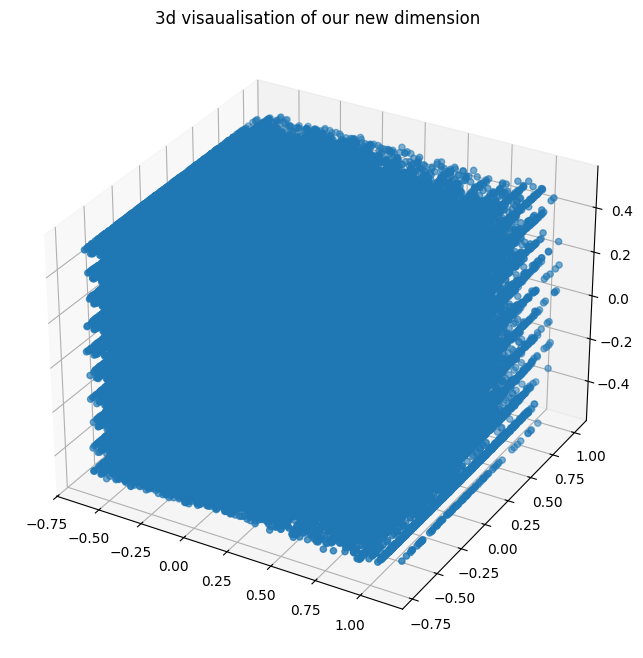

In [78]:
#visualizing our new data dimensions
x = pca_df["dim1"]
y = pca_df["dim2"]
z = pca_df["dim3"]

fig = plt.figure(figsize=(9,8))
ax = fig.add_subplot(111,projection="3d")
ax.scatter(x,y,z,marker="o")
ax.set_title("3d visaualisation of our new dimension");


In [79]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=10))

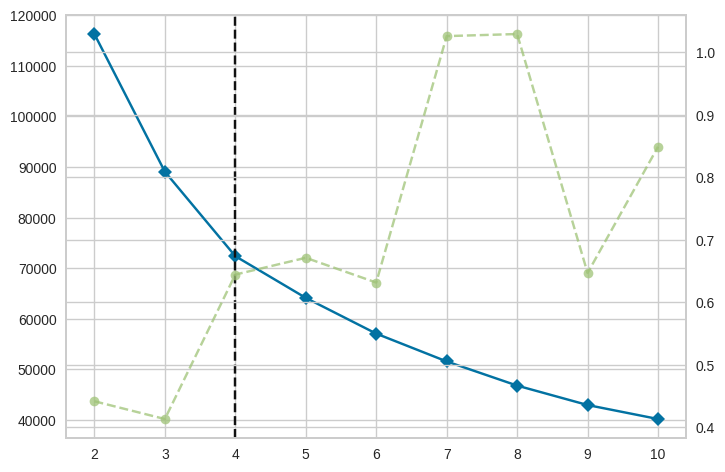

In [80]:
#clustering section
#using the k elbow visualizer method to figure the appropriate number of clusters
elbow_k = KElbowVisualizer(estimator=KMeans())
elbow_k.fit(pca_df)

In [81]:
data3

,Description,Quantity,UnitPrice,Country,cohort date,first_purchase_date,latest_purchase_date,cohort_index,Revenue
0,Electronics,65,10.23,Egypt,2010-12-01,2010-12-01,2011-02-01,1,664.95
1,Furniture,95,19.61,Mali,2010-12-01,2010-12-01,2011-02-01,1,1862.95
2,Books,78,61.49,Mali,2010-12-01,2010-12-01,2011-02-01,1,4796.22
3,Toys,15,24.73,South Africa,2010-12-01,2010-12-01,2011-02-01,1,370.95
4,Toys,50,38.83,Rwanda,2010-12-01,2010-12-01,2011-02-01,1,1941.50
...,...,...,...,...,...,...,...,...,...
541904,Furniture,25,36.53,Mozambique,2011-08-01,2011-08-01,2011-12-01,5,913.25
541905,Cloths,94,90.65,Tunisia,2011-08-01,2011-08-01,2011-12-01,5,8521.10
541906,Furniture,14,40.07,Somalia,2011-08-01,2011-08-01,2011-12-01,5,560.98
541907,Cosmetics,45,79.83,Senegal,2011-08-01,2011-08-01,2011-12-01,5,3592.35


In [82]:
#apply kmeans clustering on our new dimensions to generate clusters
kmeans = KMeans(n_clusters=4,random_state=42)
pred_clust = kmeans.fit_predict(pca_df)

pca_df["clusters"] = pred_clust
data3["clusters"] = pred_clust

In [83]:
pca_df,pca_df["clusters"]

(            dim1      dim2      dim3  clusters
 0      -0.014665 -0.249922 -0.168044         3
 1      -0.013522  0.049938 -0.054090         3
 2      -0.013984  0.359160 -0.496411         0
 3      -0.011369 -0.485164  0.503690         1
 4      -0.011589 -0.106414  0.503506         1
 ...          ...       ...       ...       ...
 406824  0.525655 -0.325677 -0.061916         2
 406825  0.527181  0.837089 -0.387385         0
 406826  0.526375 -0.392267 -0.059929         2
 406827  0.526216  0.193376 -0.280380         2
 406828  0.526080 -0.421326  0.491392         2
 
 [406829 rows x 4 columns],
 0         3
 1         3
 2         0
 3         1
 4         1
          ..
 406824    2
 406825    0
 406826    2
 406827    2
 406828    2
 Name: clusters, Length: 406829, dtype: int32)

Text(0.5, 0.92, '3d visaualisation of our new dimension')

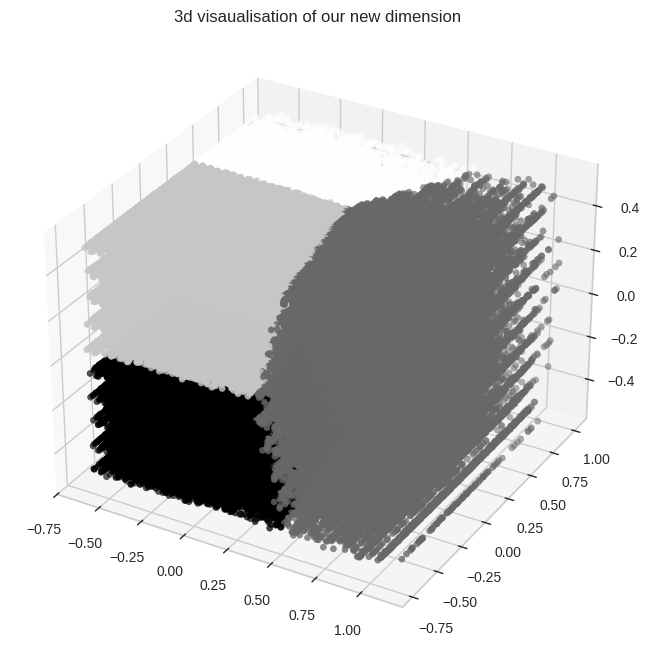

In [84]:
#plotting new data points
fig = plt.figure(figsize=(9,8))
ax = fig.add_subplot(111,projection="3d")
ax.scatter(x,y,z,c=pca_df.clusters,marker="o")
ax.set_title("3d visaualisation of our new dimension")

Text(0.5, 0.92, '3d visaualisation of our new dimension')

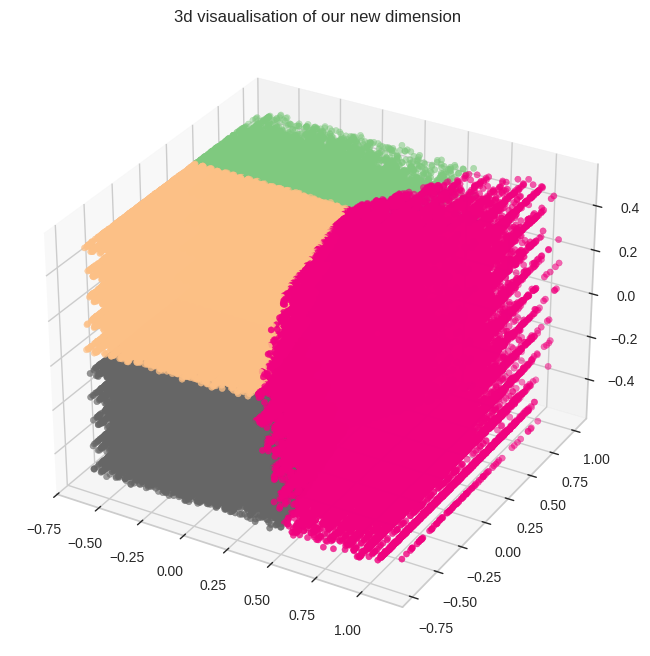

In [85]:
cmap= "Accent"
fig = plt.figure(figsize=(9,8))
ax = fig.add_subplot(111,projection="3d")
ax.scatter(x,y,z,c=pca_df.clusters,marker="o",cmap=cmap)
ax.set_title("3d visaualisation of our new dimension")

In [86]:
## Cluster profiling
#Get cluster centers in the PCA space
cluster_centers_pca = kmeans.cluster_centers_

print(cluster_centers_pca)

[[-0.18190589  0.46338375  0.00363107]
 [-0.21082021 -0.1866639   0.29149265]
 [ 0.68564292 -0.01540194 -0.00165572]
 [-0.21329656 -0.18339869 -0.29430412]]


In [87]:
# Calculate mean and standard deviation for numerical features
cluster_summary = pca_df.groupby('clusters').agg(['mean', 'std']).reset_index()
cluster_summary

clusters      dim1                dim2                dim3          
                mean       std      mean       std      mean       std
0        0 -0.182888  0.264823  0.462521  0.201438  0.003052  0.294955
1        1 -0.210430  0.246469 -0.186920  0.222252  0.291590  0.156469
2        2  0.685764  0.232612 -0.014836  0.333136 -0.001658  0.309586
3        3 -0.212924  0.246356 -0.184195  0.223918 -0.294308  0.156048

In [88]:
# Inverse transform to get cluster centers in the original feature space
cluster_centers_original = pca.inverse_transform(cluster_centers_pca)

# Create a DataFrame for cluster centers
cluster_centers_df = pd.DataFrame(data=cluster_centers_original, columns=scaled_data.columns)
cluster_centers_df['Cluster'] = range(4)

print(cluster_centers_df)

   Description  Quantity  UnitPrice   Country  cohort date  \
0     0.502987  0.770283   0.754218  0.498578     0.111773   
1     0.793215  0.391014   0.398160  0.501988     0.094075   
2     0.501397  0.490895   0.491987  0.501992     0.622424   
3     0.207445  0.392439   0.397622  0.496699     0.094815   

   first_purchase_date  latest_purchase_date  cohort_index   Revenue  Cluster  
0             0.111773              0.893379      0.448816  0.531860        0  
1             0.094075              0.894066      0.463590  0.143851        1  
2             0.622424              0.828167     -0.028234  0.246009        2  
3             0.094815              0.895796      0.467090  0.144707        3  


##Insights

**Cluster Characteristics**:

- Cluster 0:
Higher values in Revenue (0.531860), suggesting these are high-value customers.
Quantity (0.770283) and UnitPrice (0.754218) are also elevated, implying these customers purchase larger quantities of higher-priced items.
Description (0.502987) and Country (0.498578) are neutral, indicating an average distribution across products and locations.
Cohort Index (0.448816) suggests these customers are mid-stage in the customer lifecycle.

- Cluster 1:
Lowest Revenue (0.143851) and moderate UnitPrice (0.398160), indicating low-value customers who buy less expensive items.
Cohort Index (0.463590) shows these customers are mid-lifecycle but have less impact on revenue.
These customers might be newer or less engaged.

- Cluster 2:
Moderate Revenue (0.246009) and balanced values across Quantity (0.490895) and UnitPrice (0.491987).
Cohort Index (-0.028234) indicates customers who may be nearing the end of their lifecycle or churning.
first_purchase_date (0.622424) and latest_purchase_date (0.828167) suggest these customers had their first purchase some time ago but may not be actively purchasing now.

- Cluster 3:
Similar behavior to Cluster 1 with slightly higher Revenue (0.144707) but still low impact overall.
Cohort Index (0.467090) places them in a similar lifecycle stage to Cluster 1.
Potential overlap with Cluster 1 in terms of characteristics but could represent a different product preference group.

**Customer Lifecycle Analysis**:
The cohort_index reflects customer lifecycle stages:
- Clusters 0 and 2 show customers at different ends of the spectrum (high-value vs. likely churn).
- Clusters 1 and 3 show mid-lifecycle customers with lower engagement.



In [89]:
# Get PCA loadings
loadings = pca.components_
loading_df = pd.DataFrame(loadings, columns=scaled_data.columns, index=['dim1', 'dim2', 'dim3'])

print(loading_df)

# Describe clusters
for i in range(4):  # Adjust the range based on the number of clusters
    print(f"Cluster {i} Profile:")
    print(cluster_centers_df.loc[cluster_centers_df['Cluster'] == i].drop(columns=['Cluster']).T)
    print("\n")

      Description  Quantity  UnitPrice   Country  cohort date  \
dim1     0.002179  0.000154   0.000994  0.003217     0.588258   
dim2    -0.003771  0.583804   0.549459 -0.001400    -0.000601   
dim3     0.999925  0.000821   0.003977  0.009007    -0.003754   

      first_purchase_date  latest_purchase_date  cohort_index   Revenue  
dim1             0.588258             -0.074579     -0.549842  0.000382  
dim2            -0.000601              0.001094      0.000114  0.597703  
dim3            -0.003754             -0.002631     -0.003651  0.001870  
Cluster 0 Profile:
                             0
Description           0.502987
Quantity              0.770283
UnitPrice             0.754218
Country               0.498578
cohort date           0.111773
first_purchase_date   0.111773
latest_purchase_date  0.893379
cohort_index          0.448816
Revenue               0.531860


Cluster 1 Profile:
                             1
Description           0.793215
Quantity              0.391014


##Key Insights:

**Customer Segmentation Based on Purchasing Behavior**:

**Cluster 0**:
Customers in this cluster are associated with higher revenue contributions and tend to purchase large quantities or high-priced items.
They likely represent the most valuable customer group and should be prioritized for retention strategies.
The positive correlation between features like Quantity and Revenue suggests these customers are highly engaged and make consistent, high-value purchases.

**Cluster 1**:
These customers exhibit moderate spending habits with purchases spread across multiple categories.
While they don’t contribute as significantly to revenue as Cluster 0, they show potential for increased engagement through targeted incentives or personalized offers.

**Cluster 2**:
This group likely includes customers making smaller, sporadic purchases.
The lower correlation between Quantity, UnitPrice, and Revenue indicates less frequent transactions, suggesting these may be occasional buyers or those with specific, lower-value needs.
Engagement strategies like loyalty programs might help convert them into repeat buyers.

**Cluster 3**:
- In the PCA analysis, the cohort index (dim2) for Cluster 3 indicated weaker long-term engagement compared to Clusters 0 or 1.
- Retention Trends: In the cohort retention trends by cluster, Cluster 3 showed rapid drops in retention over time, suggesting that customers in this group tend not to make repeat purchases after their first few transactions.


### CLUSTERING MODEL EVALUATION

In [90]:
#import evaluation metric
from sklearn.metrics import silhouette_score

In [91]:
# Take a sample of the data
sample_size = 10000  # Adjust based on your system's capacity
data_sample = pca_df.sample(n=sample_size, random_state=42)

In [92]:
# Compute silhouette score on the sample
score = silhouette_score(data_sample, data_sample["clusters"], metric='euclidean')
print(f"Silhouette Score (sampled): {score}")

Silhouette Score (sampled): 0.6083544959401541


###### Moderately Good Clustering: A score around 0.6 is generally considered to indicate that the clustering is reasonably good, with the clusters being relatively distinct and internally cohesive.

### Now Carry EDA post Feature Engineering

clusters
1    111218
3    110621
2     93006
0     91984
Name: count, dtype: int64


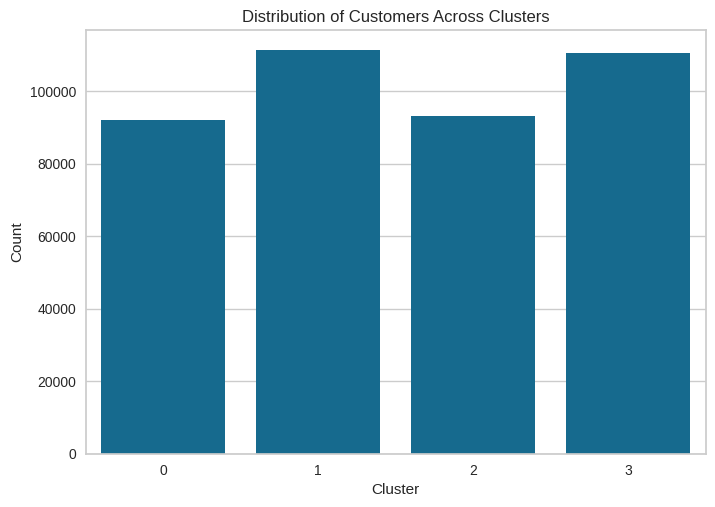

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Print the counts of each cluster
cluster_counts = data3['clusters'].value_counts()
print(cluster_counts)

# Plot the countplot of the clusters
sns.countplot(x=data3['clusters'])

# Display the plot
plt.title('Distribution of Customers Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

##Key Insights:

**Retention Focus**:
- Cluster 3 (large size, high churn risk): Retention strategies should be prioritized here to prevent revenue loss.
- Cluster 1 (large size, potential for growth): This group shows promise for retention and conversion into loyal customers through targeted campaigns.

**Profitability**:
- Despite its smaller size, Cluster 0 is likely the most profitable and warrants focused efforts on personalized marketing and loyalty programs to maintain engagement.

**Cluster Strategy**:
- Cluster 2 has a moderate size and stable engagement. While it doesn’t require aggressive retention efforts, it could benefit from strategies to encourage upselling or cross-selling.

### Purchase Behavious

<Axes: xlabel='clusters', ylabel='Revenue'>

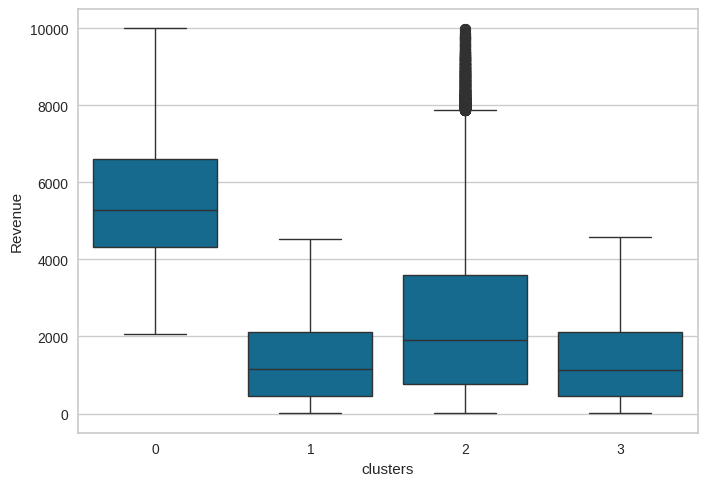

In [94]:
#Revenue Contribution per Cluster
sns.boxplot(x="clusters",y="Revenue", data=data3)


clusters
0    5538.327640
1    1363.380960
2    2421.461349
3    1366.424582
Name: Revenue, dtype: float64


<Axes: title={'center': 'Average Revenue per Cluster'}, xlabel='clusters'>

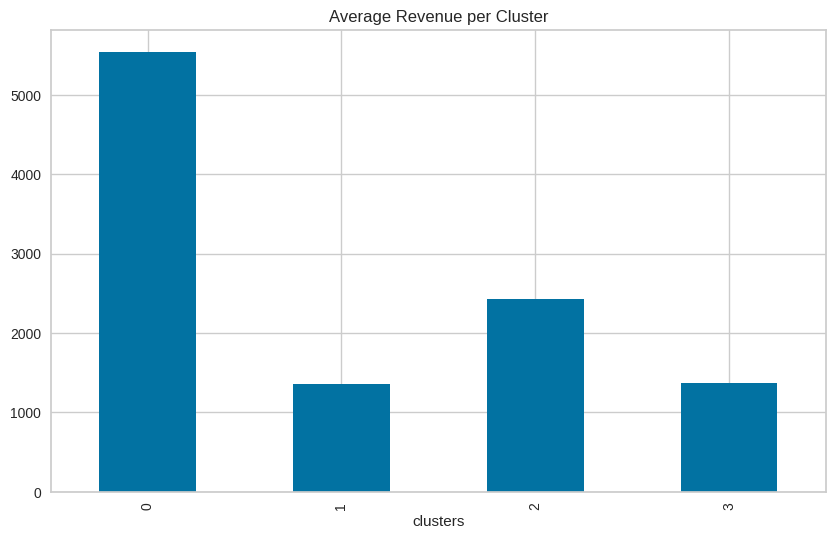

In [95]:
##Average Revenue per Customer by Cluster
avg_revenue = data3.groupby('clusters')['Revenue'].mean()
print (avg_revenue)
avg_revenue.plot(kind='bar', figsize=(10, 6), title="Average Revenue per Cluster")

##Insights

- Cluster 0 aligns with high-value customers identified in previous analyses (based on quantity, unit price, and revenue). Retaining these customers is crucial.
- Cluster 3 remains a priority for churn prevention due to low revenue and high likelihood of customer loss.
- Cluster 1 and 2 show potential for growth, particularly Cluster 2, which could be elevated closer to Cluster 0 with the right strategy.


In [96]:
countries = data3.groupby("Country")["Revenue"].sum().reset_index()
Top_5= countries.sort_values('Revenue',ascending = False)

T_5 = Top_5.head()
T_5

,Country,Revenue
9,Libya,37690362.35
19,Somalia,37663830.57
23,Togo,37592496.96
11,Mali,37508467.02
7,Ghana,37414593.40


<Axes: xlabel='Country', ylabel='Revenue'>

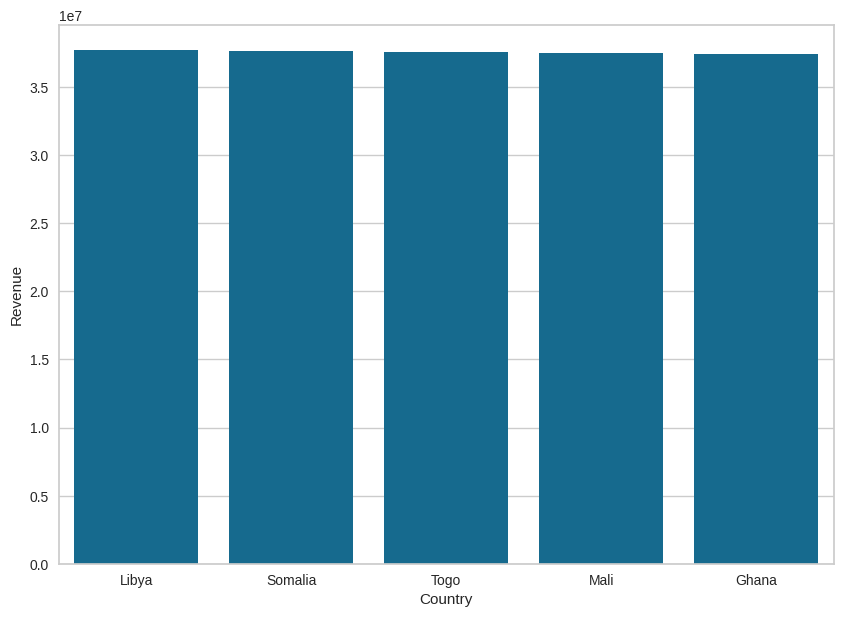

In [97]:
plt.figure(figsize=(10,7))
sns.barplot(data=T_5, x="Country", y="Revenue")

<Axes: title={'center': 'Retention Trends by Cluster'}, xlabel='cohort_index'>

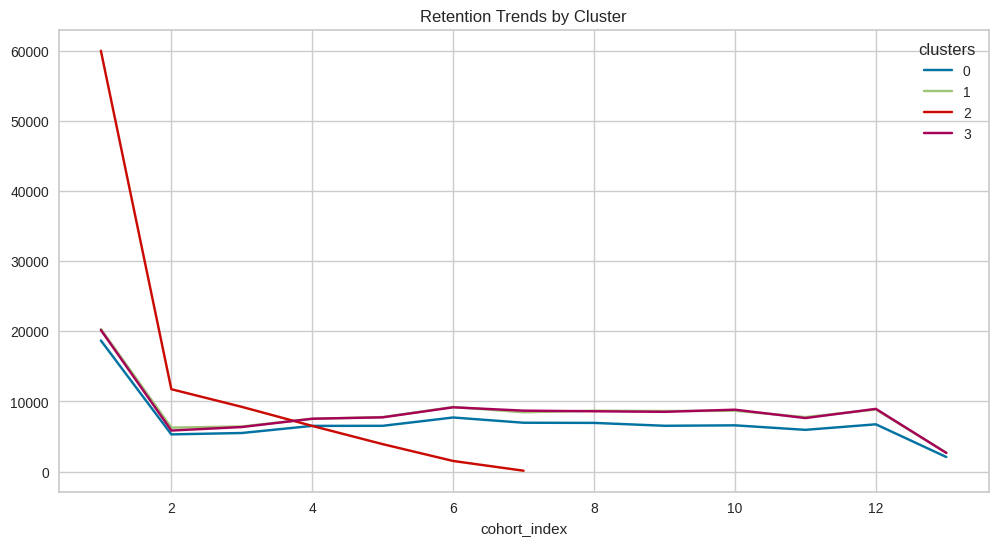

In [98]:
##Cohort Trends by Cluster
cohort_trends = data3.groupby(['cohort_index', 'clusters']).size().unstack()
cohort_trends.plot(kind='line', figsize=(12, 6), title="Retention Trends by Cluster")

##Key Insights:
- Clusters 2 and 3 have the highest initial customer volumes, but Cluster 2 churns most rapidly.
- Cluster 1 displays a delayed retention trend, suggesting customers in this group are acquired or engage over time.
- Cluster MM0 has consistent but low retention after an initial decline, implying a stable but small customer base over time.

**Relationships to Insights**:
- Cluster 2 is more likely to churn quickly based on these trends, aligning with the previous insight that it may represent inconsistent buyers.
- Cluster 1’s delayed rise and stabilization reflect its potential as a growing segment, possibly due to new or latent customer acquisition.
- Cluster 3, despite its drop-off, maintains moderate retention, suggesting higher long-term value compared to Cluster 2.

### Customer Behavior Analysis

In [99]:
#Product Preferences per Cluster
product_preferences = data3.groupby(['clusters', 'Description'])['Quantity'].sum().unstack()
product_preferences.idxmax(axis=1)  # Top product per cluster

,0
clusters,
0,Jewelry
1,Toys
2,Furniture
3,Books


##Key Insights:

**Cluster 0 (Jewelry)**:
- Customers in this cluster primarily purchase jewelry.
- Combined with the high average revenue per customer in Cluster 0, these customers may be high-value buyers who prefer luxury or premium items.

**Cluster 1 (Toys)**:
- This cluster prefers toys, suggesting that these customers may include families or individuals shopping for children.
- The lower average revenue indicates smaller or less frequent purchases, aligning with a customer segment focused on relatively affordable products.

**Cluster 2 (Furniture)**:
- Customers in Cluster 2 are inclined toward purchasing furniture, likely reflecting a focus on higher-ticket items.
- This is consistent with their moderate average revenue, suggesting occasional large purchases rather than frequent small ones.

**Cluster 3 (Books)**:
- Cluster 3 prefers books, which may appeal to a cost-conscious or niche audience like students, professionals, or hobbyists.
- With lower average revenue, these customers are likely making smaller, consistent purchases.


##Let's justify the product preference accross clusters as it align with the trends observed in cohort trends by cluster and Revenue trends by cluster over time

**Cluster 0 (Premium Shoppers)**
- Product Preference: Jewelry aligns with their high-value nature and their tendency to spend more per transaction.
- Retention and Revenue Trends:
-- Cluster 0's consistent retention and high average revenue reflect that these customers are likely more inclined to purchase luxury or high-ticket items like jewelry.
-- Their revenue contribution is steady over time, further supporting the idea that premium, non-essential, and luxurious products like jewelry are appealing to this group.

**Cluster 1 ( Occasional Buyers)**
- Product Preference: Toys suggest impulsive or gift-oriented purchases, reflecting irregular but purposeful buying patterns.
- Retention and Revenue Trends:
-- Retention trends show a decline over time, which aligns with customers buying toys occasionally (e.g., seasonal purchases for holidays or birthdays).
-- The lower revenue trends over time indicate their less frequent but consistent spending, which corresponds to the typical behavior of occasional buyers.

**Cluster 2 (Potential Growth)**
- Product Preference: Furniture represents a mix of necessity and infrequent but higher-value purchases.
- Retention and Revenue Trends:
--Retention for Cluster 2 drops off quickly after the initial few months, reflecting the typical behavior of customers purchasing furniture (a long-term investment).
-- Revenue trends align with this pattern, as furniture generates moderate revenue but doesn’t sustain consistent engagement over time.

**Cluster 3 (Price-Sensitive/Low Engagement)**
- Product Preference: Books indicate a preference for lower-cost, more frequent, and functional purchases.
- Retention and Revenue Trends:
-- Retention trends show a rapid drop-off after the first cohort month, consistent with price-sensitive behavior or trial buyers.
-- Revenue trends are also low, reflecting the relatively lower profit margins and spending capacity typically associated with book purchases.
